<a href="https://colab.research.google.com/github/RobbieEarle/csci4146/blob/main/Harris_local_csci4146_a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls drive/MyDrive/CSCI_4146_a2/

2nd_test.zip


In [5]:
! unzip drive/MyDrive/CSCI_4146_a2/2nd_test.zip -d bearing_data_2
! ls bearing_data_2

Archive:  drive/MyDrive/CSCI_4146_a2/2nd_test.zip
   creating: bearing_data_2/2nd_test/
  inflating: bearing_data_2/2nd_test/2004.02.12.10.32.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.10.42.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.10.52.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.11.02.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.11.12.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.11.22.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.11.32.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.11.42.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.11.52.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.12.02.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.12.12.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.12.22.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.12.32.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.12.42.39  
  inflating: bearing_data_2/2nd_test/2004.02.12.12.52.39  
  inflating: bearing_data_2

# 1) Data Understanding and Feature Engineering

In [58]:
test = {
    "1": [1, 2, 3],
    "2": [4, 5, 6]
}
test_df = pd.DataFrame(test)
display(test_df)
test_df['avg'] = test_df[['1', '2']].mean(axis=1)
display(test_df)
drop_names = ['1', '2']
test_df = test_df.drop(drop_names, axis=1)
display(test_df)

,1,2
0,1,4
1,2,5
2,3,6


,1,2,avg
0,1,4,2.5
1,2,5,3.5
2,3,6,4.5


,avg
0,2.5
1,3.5
2,4.5


### (1a) Feature Extraction

In [61]:
import pandas as pd
import glob, os
import numpy as np

def digest_file_raw(path):
  return pd.read_table(path, header=None, names=['b1', 'b2', 'b3', 'b4'])

def digest_test_file(path):
  return digest_file(path, test=True)

def digest_file(path, test=False):
  if test:
    raw_names = ['b1a', 'b1b', 'b2a', 'b2b', 'b3a', 'b3b', 'b4a', 'b4b']
    df = pd.read_table(path, header=None, names=raw_names)
    df['b1'] = df[['b1a', 'b1b']].mean(axis=1)
    df['b2'] = df[['b2a', 'b2b']].mean(axis=1)
    df['b3'] = df[['b3a', 'b3b']].mean(axis=1)
    df['b4'] = df[['b4a', 'b4b']].mean(axis=1)
    df = df.drop(raw_names, axis=1)
  else:
    df = pd.read_table(path, header=None, names=['b1', 'b2', 'b3', 'b4'])
  file = path.rsplit('/', 1)[1]
  file_parts = file.split('.')

  # df['file'] = file
  day = int(file_parts[2]) * 1000000000     # Final day is 19
  hour = int(file_parts[3]) * 1000000    # Final hour 06
  minute = int(file_parts[4]) * 1000   # Final minute 22
  second = int(file_parts[5])          # Final second 39

  df_out = pd.DataFrame({"date": [day + hour + minute + second]})

  for col in df.columns:
    # Vibrational Signal
    vib_sig = df[col].max()
    df_out[col + '_vib_sig'] = vib_sig

    # RMS
    rms = np.sqrt((df[col] ** 2).sum() / df.shape[0])
    df_out[col + '_rms'] = rms

    # Variance
    var = (((df[col] - df[col].mean()) ** 2).sum()) / (df.shape[0] - 1)
    df_out[col + '_var'] = var

    # Skewness
    skew = (((df[col] - df[col].mean()) ** 3).sum()) / (df.shape[0] - 1)
    df_out[col + '_skew'] = skew

    # Kurtosis
    kurt = (((df[col] - df[col].mean()) ** 4).sum()) / (df.shape[0] - 1)
    df_out[col + '_kurt'] = kurt

    # Shape Factor
    shape = rms / ((np.abs(df[col])).sum() / df.shape[0])
    df_out[col + '_shape'] = shape

    # Crest Factor
    crest = (np.abs(df[col])).max() / rms
    df_out[col + '_crest'] = crest

  return df_out

def import_dataset(path, raw=False, test=False):
  if test:
    df = pd.concat(map(digest_test_file, glob.glob(os.path.join('', path))))
  else:
    if raw:
      df = pd.concat(map(digest_file_raw, glob.glob(os.path.join('', path))))
    else:
      df = pd.concat(map(digest_file, glob.glob(os.path.join('', path))))

  return df

In [10]:
df = import_dataset('bearing_data_2/2nd_test/*', raw=False)
df = df.sort_values('date')
display(df)
df = df.drop('date', axis=1)
df['rul'] = np.arange(df.shape[0])
df['rul'] = df['rul'].sort_values(ascending=False)
df['rul'] *= 600
display(df)

,date,b1_vib_sig,b1_rms,b1_var,b1_skew,b1_kurt,b1_shape,b1_crest,b2_vib_sig,b2_rms,b2_var,b2_skew,b2_kurt,b2_shape,b2_crest,b3_vib_sig,b3_rms,b3_var,b3_skew,b3_kurt,b3_shape,b3_crest,b4_vib_sig,b4_rms,b4_var,b4_skew,b4_kurt,b4_shape,b4_crest
0,12010032039,0.454,0.074179,5.398829e-03,3.331840e-05,1.057637e-04,1.271660,6.120331,0.464,0.090944,0.008110,9.269047e-05,2.306398e-04,1.266071,5.640841,1.023,0.109404,1.175840e-02,2.611716e-04,8.589776e-04,1.314254,9.350652,0.193,0.054103,0.002827,-3.318425e-06,2.449832e-05,1.256323,4.879539
0,12010042039,0.369,0.075382,5.676110e-03,2.229731e-05,1.175357e-04,1.277742,5.147086,0.457,0.093419,0.008721,5.707974e-05,2.473961e-04,1.262276,5.148852,0.752,0.109817,1.205438e-02,-3.156895e-05,6.386341e-04,1.300555,6.847735,0.249,0.056101,0.003133,2.775109e-07,3.050393e-05,1.259563,4.438435
0,12010052039,0.503,0.076230,5.805092e-03,1.451051e-05,1.183951e-04,1.265456,6.598472,0.491,0.093718,0.008781,7.946471e-05,2.552458e-04,1.262645,5.367171,0.933,0.109861,1.206749e-02,7.497726e-05,8.212740e-04,1.309082,8.492546,0.354,0.056145,0.003140,1.239708e-05,3.211944e-05,1.263337,6.305078
0,12011002039,0.608,0.078724,6.192537e-03,2.021592e-05,1.594393e-04,1.281033,7.723217,0.569,0.092947,0.008634,8.490284e-05,2.411619e-04,1.258710,6.121762,1.016,0.110667,1.223777e-02,4.541888e-05,8.510285e-04,1.310246,9.180734,0.513,0.056807,0.003213,-6.616623e-06,3.929684e-05,1.260116,9.241749
0,12011012039,0.391,0.078474,6.152736e-03,1.362102e-05,1.363958e-04,1.278896,4.982524,0.452,0.095348,0.009089,8.488972e-05,2.665267e-04,1.261110,5.097120,0.745,0.107506,1.155668e-02,-3.593030e-06,6.114457e-04,1.297801,7.171719,0.244,0.056841,0.003224,3.479013e-06,3.262011e-05,1.259820,4.292680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,19005042039,4.998,0.725001,5.256452e-01,-1.945684e-01,4.303955e+00,1.599323,6.896538,1.118,0.218294,0.047654,6.678513e-03,1.238209e-02,1.355773,5.121522,0.686,0.170577,2.909421e-02,-5.943077e-05,2.456313e-03,1.241061,4.508234,0.542,0.148351,0.022000,-1.695155e-04,1.406843e-03,1.246204,3.666976
0,19005052039,2.688,0.462012,2.134451e-01,-3.208435e-02,3.079612e-01,1.368621,6.235773,0.908,0.170817,0.029179,2.314868e-03,3.329939e-03,1.290185,5.315634,0.764,0.177878,3.164024e-02,6.250350e-04,2.683625e-03,1.226772,4.295083,0.527,0.116630,0.013592,1.899843e-04,6.021717e-04,1.266029,4.518571
0,19006002039,3.501,0.483835,2.341052e-01,-4.271272e-02,4.324885e-01,1.378077,7.638962,0.891,0.193641,0.037496,2.808812e-03,4.682477e-03,1.271785,4.601296,0.845,0.187405,3.512065e-02,1.626289e-03,3.532874e-03,1.238671,4.508940,0.625,0.130582,0.017042,3.736879e-04,1.073667e-03,1.295288,4.786252
0,19006012039,0.005,0.002103,9.748642e-07,5.579657e-10,6.307719e-12,1.132578,2.377543,0.007,0.004018,0.000002,-9.573625e-10,5.558585e-12,1.076734,1.742236,0.007,0.003950,2.239016e-06,-6.570522e-10,5.336693e-12,1.080519,1.772075,0.005,0.002154,0.000001,1.146763e-09,9.784223e-12,1.205903,2.321622


,b1_vib_sig,b1_rms,b1_var,b1_skew,b1_kurt,b1_shape,b1_crest,b2_vib_sig,b2_rms,b2_var,b2_skew,b2_kurt,b2_shape,b2_crest,b3_vib_sig,b3_rms,b3_var,b3_skew,b3_kurt,b3_shape,b3_crest,b4_vib_sig,b4_rms,b4_var,b4_skew,b4_kurt,b4_shape,b4_crest,rul
0,0.454,0.074179,5.398829e-03,3.331840e-05,1.057637e-04,1.271660,6.120331,0.464,0.090944,0.008110,9.269047e-05,2.306398e-04,1.266071,5.640841,1.023,0.109404,1.175840e-02,2.611716e-04,8.589776e-04,1.314254,9.350652,0.193,0.054103,0.002827,-3.318425e-06,2.449832e-05,1.256323,4.879539,589800
0,0.369,0.075382,5.676110e-03,2.229731e-05,1.175357e-04,1.277742,5.147086,0.457,0.093419,0.008721,5.707974e-05,2.473961e-04,1.262276,5.148852,0.752,0.109817,1.205438e-02,-3.156895e-05,6.386341e-04,1.300555,6.847735,0.249,0.056101,0.003133,2.775109e-07,3.050393e-05,1.259563,4.438435,589200
0,0.503,0.076230,5.805092e-03,1.451051e-05,1.183951e-04,1.265456,6.598472,0.491,0.093718,0.008781,7.946471e-05,2.552458e-04,1.262645,5.367171,0.933,0.109861,1.206749e-02,7.497726e-05,8.212740e-04,1.309082,8.492546,0.354,0.056145,0.003140,1.239708e-05,3.211944e-05,1.263337,6.305078,588600
0,0.608,0.078724,6.192537e-03,2.021592e-05,1.594393e-04,1.281033,7.723217,0.569,0.092947,0.008634,8.490284e-05,2.411619e-04,1.258710,6.121762,1.016,0.110667,1.223777e-02,4.541888e-05,8.510285e-04,1.310246,9.180734,0.513,0.056807,0.003213,-6.616623e-06,3.929684e-05,1.260116,9.241749,588000
0,0.391,0.078474,6.152736e-03,1.362102e-05,1.363958e-04,1.278896,4.982524,0.452,0.095348,0.009089,8.488972e-05,2.665267e-04,1.261110,5.097120,0.745,0.107506,1.155668e-02,-3.593030e-06,6.114457e-04,1.297801,7.171719,0.244,0.056841,0.003224,3.479013e-06,3.262011e-05,1.259820,4.292680,587400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4.998,0.725001,5.256452e-01,-1.945684e-01,4.303955e+00,1.599323,6.896538,1.118,0.218294,0.047654,6.678513e-03,1.238209e-02,1.355773,5.121522,0.686,0.170577,2.909421e-02,-5.943077e-05,2.456313e-03,1.241061,4.508234,0.542,0.148351,0.022000,-1.695155e-04,1.406843e-03,1.246204,3.666976,2400
0,2.688,0.462012,2.134451e-01,-3.208435e-02,3.079612e-01,1.368621,6.235773,0.908,0.170817,0.029179,2.314868e-03,3.329939e-03,1.290185,5.315634,0.764,0.177878,3.164024e-02,6.250350e-04,2.683625e-03,1.226772,4.295083,0.527,0.116630,0.013592,1.899843e-04,6.021717e-04,1.266029,4.518571,1800
0,3.501,0.483835,2.341052e-01,-4.271272e-02,4.324885e-01,1.378077,7.638962,0.891,0.193641,0.037496,2.808812e-03,4.682477e-03,1.271785,4.601296,0.845,0.187405,3.512065e-02,1.626289e-03,3.532874e-03,1.238671,4.508940,0.625,0.130582,0.017042,3.736879e-04,1.073667e-03,1.295288,4.786252,1200
0,0.005,0.002103,9.748642e-07,5.579657e-10,6.307719e-12,1.132578,2.377543,0.007,0.004018,0.000002,-9.573625e-10,5.558585e-12,1.076734,1.742236,0.007,0.003950,2.239016e-06,-6.570522e-10,5.336693e-12,1.080519,1.772075,0.005,0.002154,0.000001,1.146763e-09,9.784223e-12,1.205903,2.321622,600


### (1b) Building Data Quality Report

In [12]:
# These functions were given by Maksym in Tutorial 2 to generate the analytics 
# base tables for both continuous and categorical features

def buildContinuousFeaturesReport(features, data_df):
  conHead = ['Count', 'Miss %', 'Card.', 'Min', '1st Qrt.',
            'Mean', 'Median', '3rd Qrt', 'Max', 'Std. Dev.']

  conOut_df = pd.DataFrame(index=features, columns=conHead)
  columns_df = data_df[features]

  #COUNT
  conOut_df[conHead[0]] = len(columns_df)
  #MISS % 
  conOut_df[conHead[1]] = columns_df.isna().sum() / len(columns_df) * 100
  #CARDINALITY
  conOut_df[conHead[2]] = columns_df.nunique()
  #MINIMUM
  conOut_df[conHead[3]] = columns_df.min()
  #1ST QUARTILE
  conOut_df[conHead[4]] = columns_df.quantile(0.25)
  #MEAN
  conOut_df[conHead[5]] = columns_df.mean()
  #MEDIAN
  conOut_df[conHead[6]] = columns_df.median()
  #3rd QUARTILE
  conOut_df[conHead[7]] = columns_df.quantile(0.75)
  #MAX
  conOut_df[conHead[8]] = columns_df.max()
  #STANDARD DEVIATION
  conOut_df[conHead[9]] = columns_df.std()
  
  return conOut_df

In [13]:
with pd.option_context('display.float_format', '{:.2f}'.format):
  display(buildContinuousFeaturesReport(df.select_dtypes('number').columns.to_list(), df))

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
b1_vib_sig,984,0.00,247,0.00,0.38,0.53,0.42,0.56,5.00,0.36
b1_rms,984,0.00,984,0.00,0.08,0.11,0.08,0.11,0.73,0.06
b1_var,984,0.00,984,0.00,0.01,0.01,0.01,0.01,0.53,0.03
b1_skew,984,0.00,984,-0.23,-0.00,-0.00,-0.00,0.00,0.00,0.01
b1_kurt,984,0.00,984,0.00,0.00,0.01,0.00,0.00,4.30,0.18
b1_shape,984,0.00,984,1.13,1.27,1.30,1.27,1.30,1.61,0.05
b1_crest,984,0.00,984,2.38,4.82,5.17,5.10,5.44,9.33,0.58
b2_vib_sig,984,0.00,125,0.00,0.42,0.46,0.45,0.49,1.12,0.07
b2_rms,984,0.00,984,0.00,0.09,0.10,0.09,0.10,0.22,0.01
b2_var,984,0.00,984,0.00,0.01,0.01,0.01,0.01,0.05,0.00


### (1c) Identify Data Quality Issues

Vibration Signal, RMS, Variance, Skew, and Kurtosis all seem to have significant valid outliers across all channels. The presence of these outliers can reduce the effectiveness our models during training, so we propose capping their values at the mean $+ 2\times$ their standard deviation (or the mean $- 2\times$ the standard devation in the case of b1_skew). By setting this cap, we will not be interfering with most of the observations in each time series. Only the large spikes that occur with small RUL will be capped.

We also notice that as we approach RUL 0 (i.e. time 984), all of the features drop to 0. We propose clamping these values at mean $- 2\times$ the standard devation as well.

We also point out that the vibration signal has cardinality less than 984 across all channels, where the other aggregate statistics have unique values for all observations. We will continue to use vibration signal as a continuous variable, because it still has relatively large cardinality. We believe the reason for the lower cardinality is that early in the time series we see periodic behaviour with relatively low variance, and all vibration signal values are rounded to only 3 decimal places.

### (1d) Analyze Data

In [14]:
from matplotlib import pyplot as plt

def plot_features(df_curr):
  features = df_curr.columns.tolist()
  features.remove('rul')
  rows = int(len(features) / 4)
  fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(25, 30), squeeze=False)

  for i, feature in enumerate(features):
    time = np.arange(df_curr.shape[0])
    axes[int(i%rows)][int(i/rows)].plot(time, df_curr[feature])
    axes[int(i%rows)][int(i/rows)].set_xlabel('Time')
    axes[int(i%rows)][int(i/rows)].set_ylabel(feature)

  fig.tight_layout()

def hist_features(df_curr):
  features = df_curr.columns.tolist()
  features.remove('rul')
  rows = int(len(features) / 4)
  fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(25, 30), squeeze=False)

  for i, feature in enumerate(features):
    axes[int(i%rows)][int(i/rows)].hist(df_curr[feature], bins=50)
    axes[int(i%rows)][int(i/rows)].set_ylabel('Frequency')
    axes[int(i%rows)][int(i/rows)].set_xlabel(feature)

  fig.tight_layout()

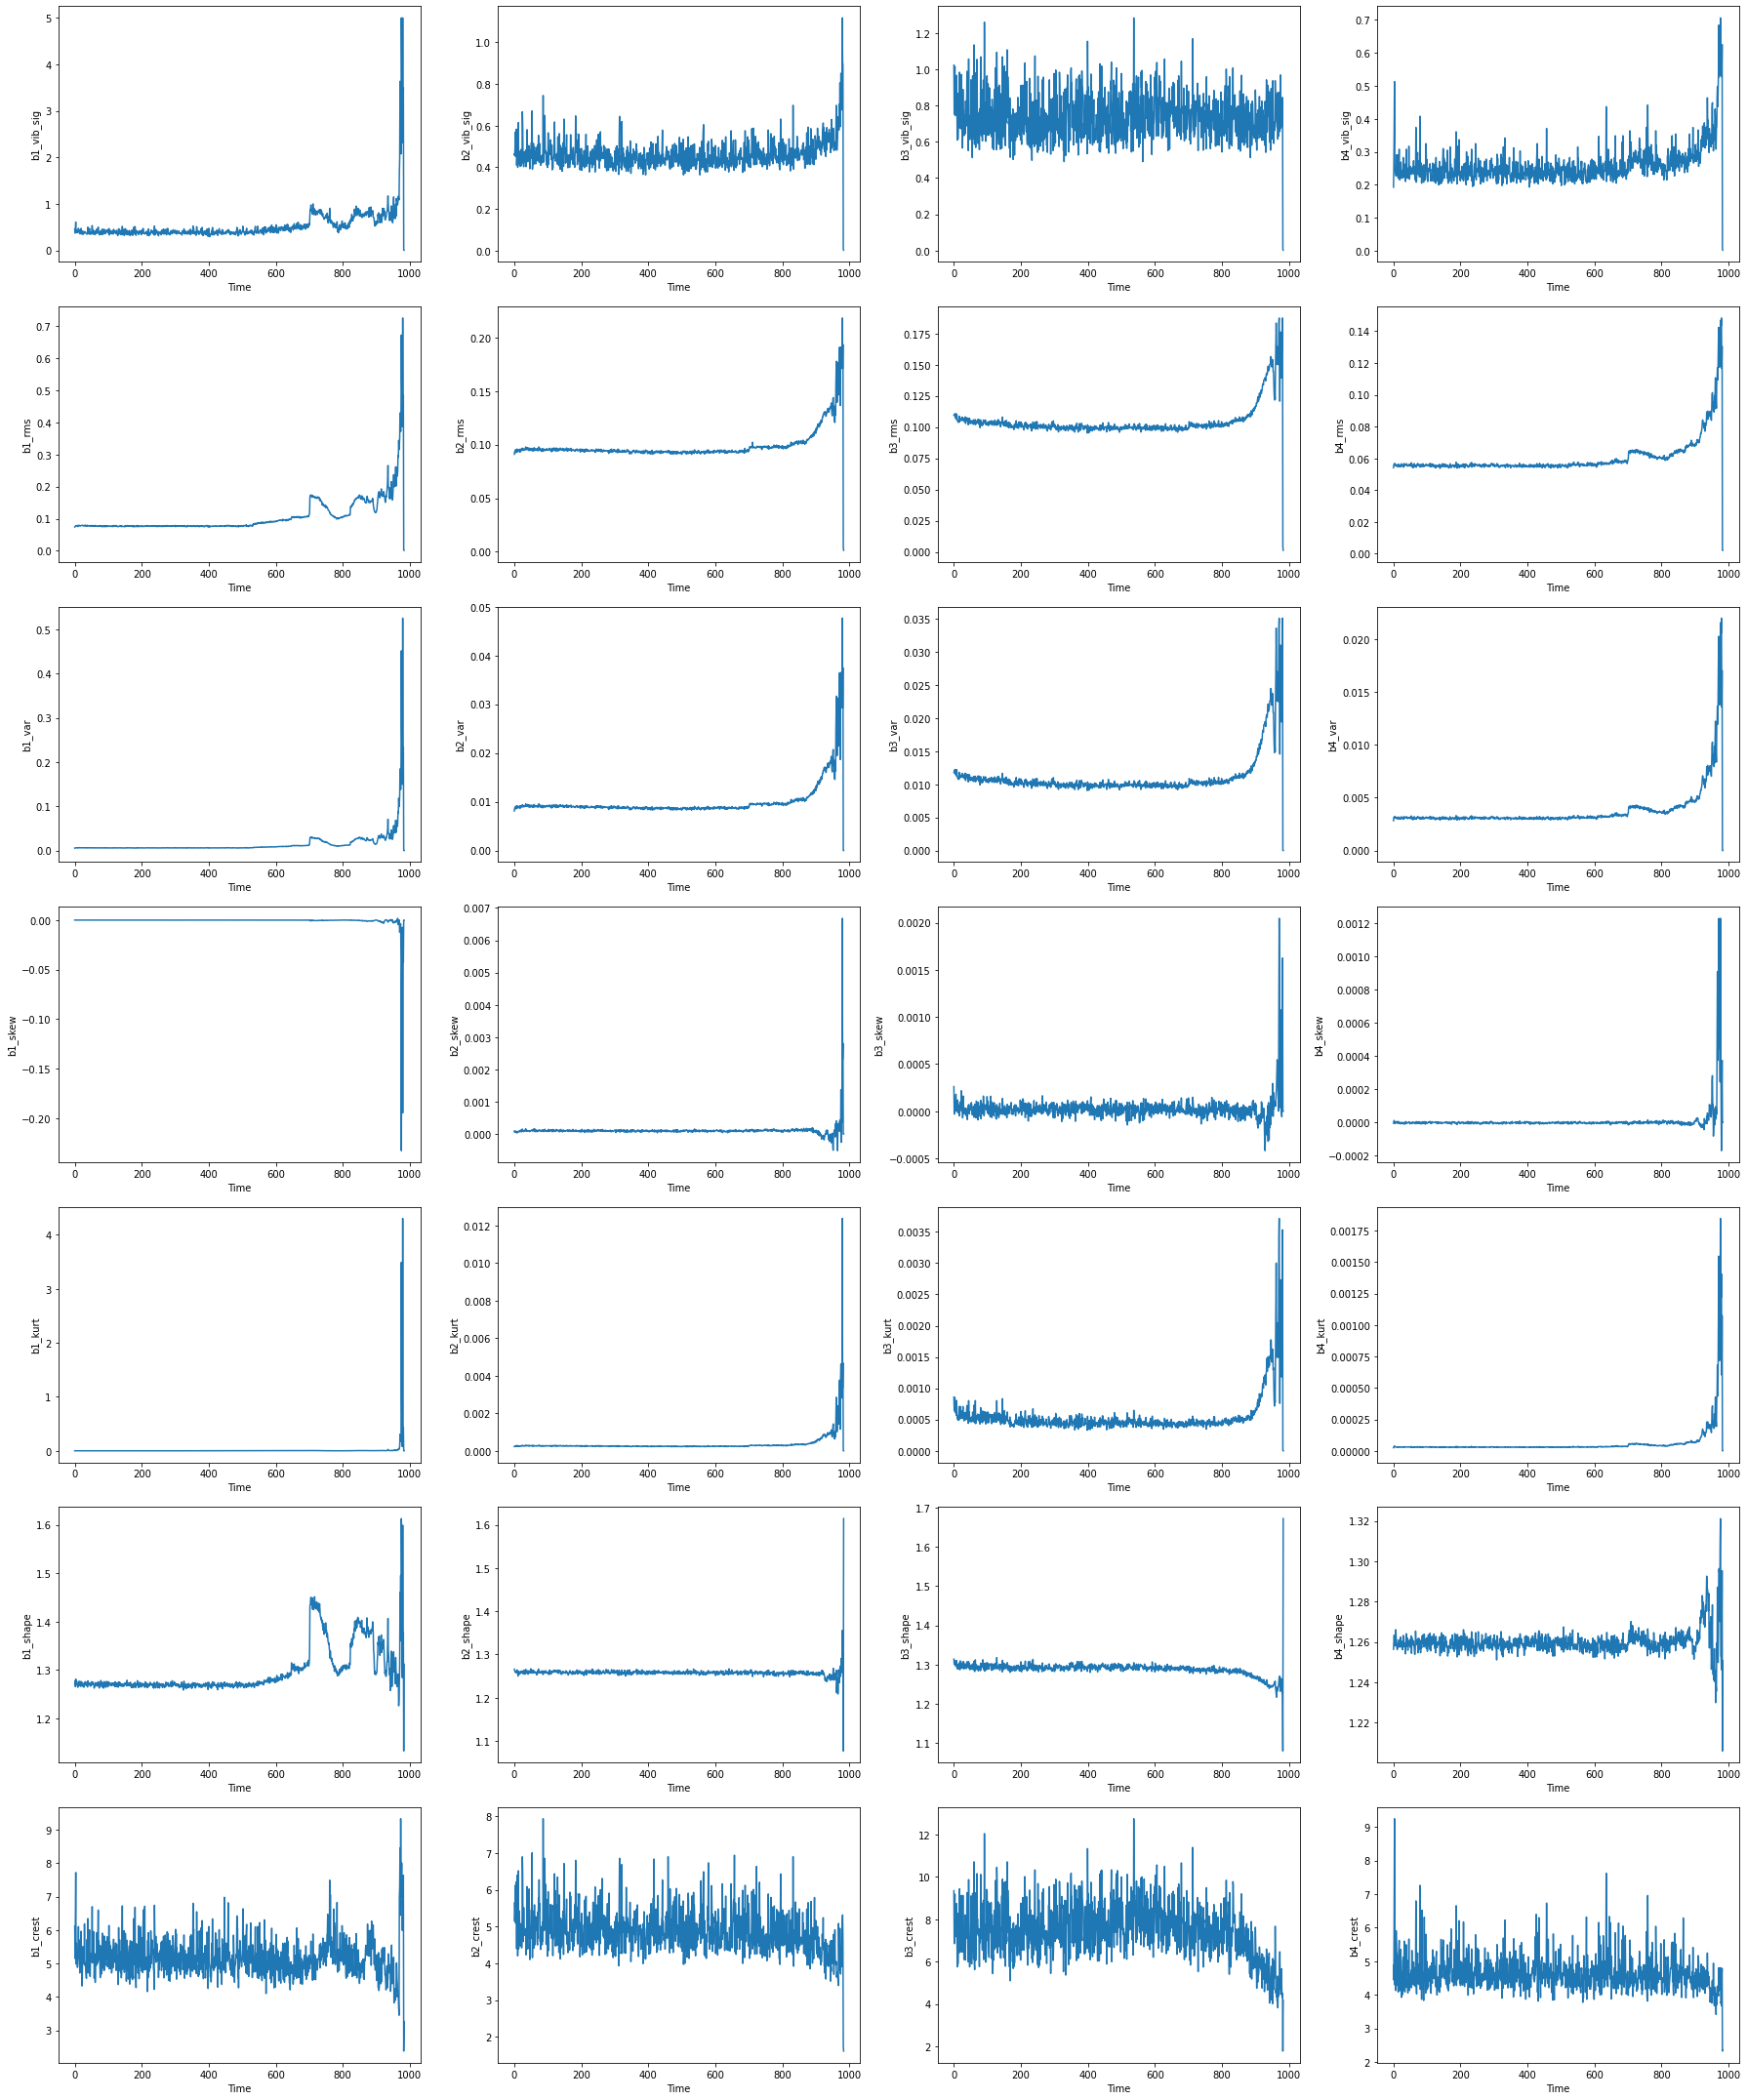

In [15]:
plot_features(df)

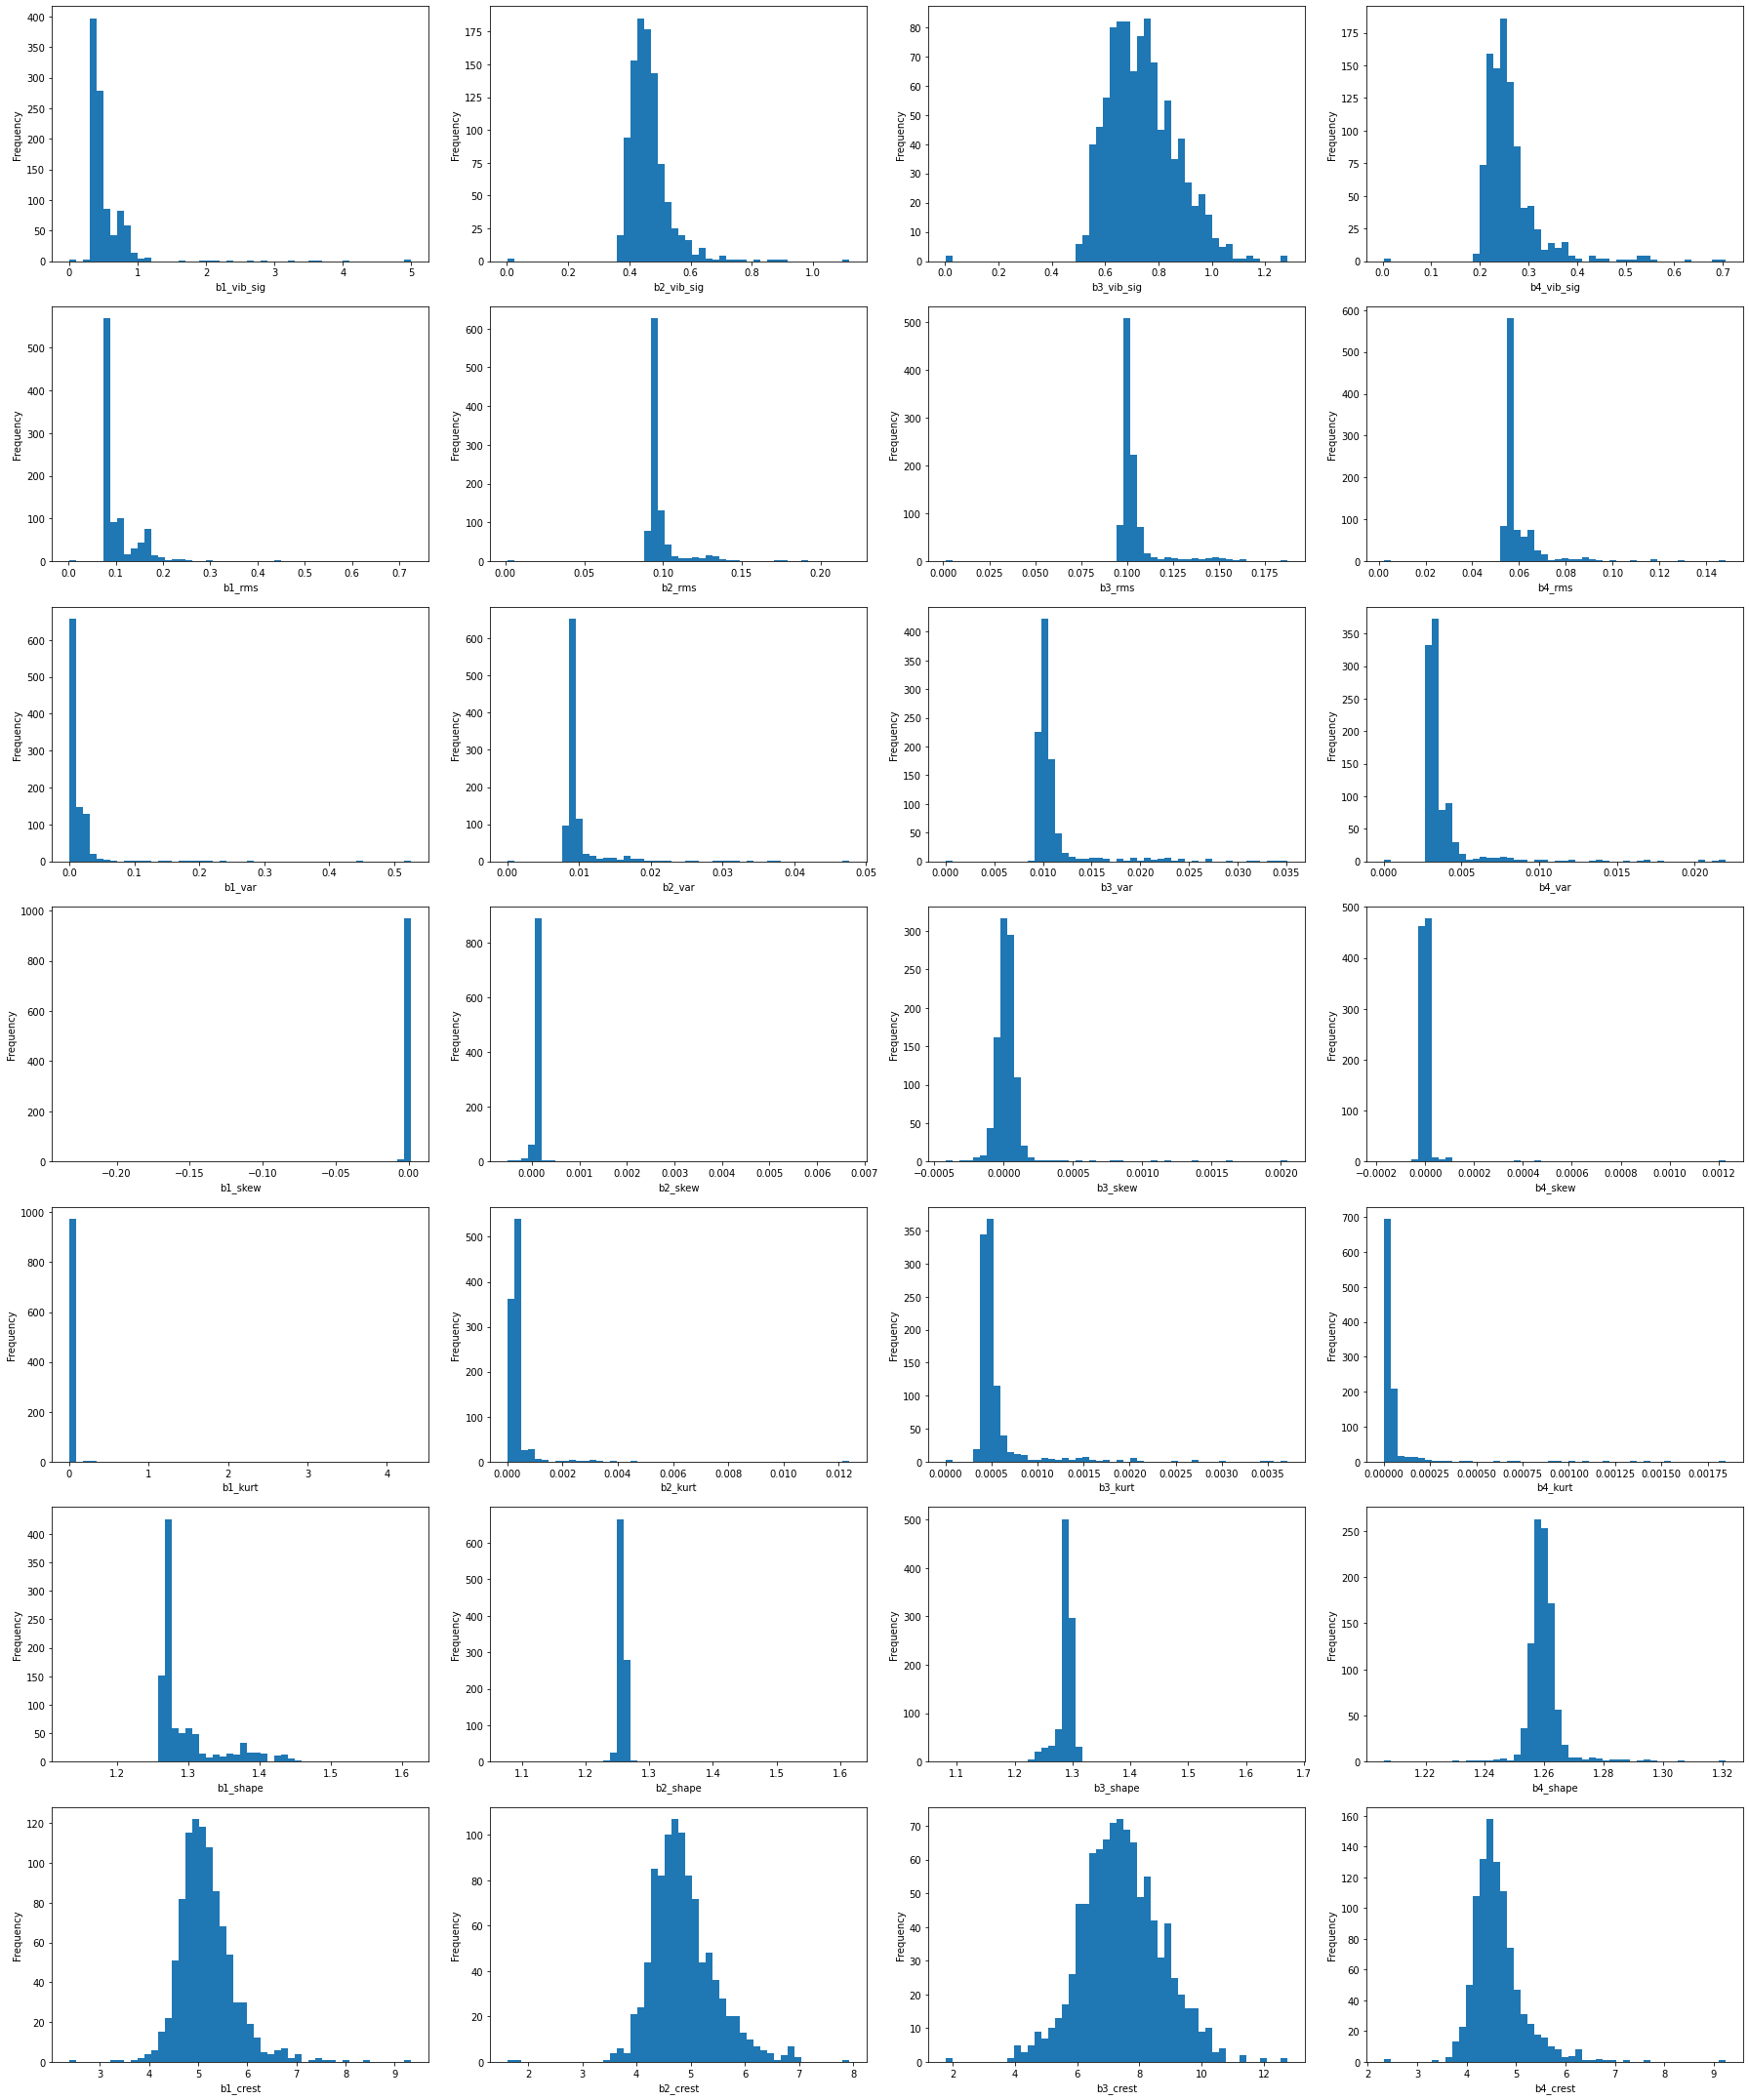

In [ ]:
hist_features(df)

In [17]:
df_normalized = df.copy()
df_normalized = df_normalized.drop('rul', axis=1)
# df_normalized = (df_normalized - df_normalized.mean()) / df_normalized.std()
df_normalized = (df_normalized-df_normalized.min())/(df_normalized.max()-df_normalized.min())
df_normalized['rul'] = df['rul']
display(df_normalized)

,b1_vib_sig,b1_rms,b1_var,b1_skew,b1_kurt,b1_shape,b1_crest,b2_vib_sig,b2_rms,b2_var,b2_skew,b2_kurt,b2_shape,b2_crest,b3_vib_sig,b3_rms,b3_var,b3_skew,b3_kurt,b3_shape,b3_crest,b4_vib_sig,b4_rms,b4_var,b4_skew,b4_kurt,b4_shape,b4_crest,rul
0,0.090472,0.100414,1.026903e-02,0.992403,2.457360e-05,0.289522,0.538087,0.413978,0.413282,0.170167,0.084486,1.862688e-02,0.352017,0.637528,0.796412,0.581107,0.334781,0.275717,2.312890e-01,0.395468,0.690235,0.271307,0.355470,0.128431,0.118842,1.326506e-02,0.437513,0.369634,589800
0,0.073459,0.102077,1.079653e-02,0.992356,2.730877e-05,0.302182,0.398167,0.407706,0.424684,0.182987,0.079535,1.998015e-02,0.344961,0.559625,0.585023,0.583326,0.343209,0.157063,1.719591e-01,0.372290,0.462277,0.350852,0.369130,0.142356,0.121414,1.651691e-02,0.465629,0.305892,589200
0,0.100280,0.103248,1.104191e-02,0.992323,2.750845e-05,0.276608,0.606828,0.438172,0.426062,0.184239,0.082647,2.061410e-02,0.345647,0.594194,0.726209,0.583561,0.343583,0.200248,2.211369e-01,0.386717,0.612081,0.500000,0.369433,0.142681,0.130080,1.739165e-02,0.498379,0.575633,588600
0,0.121297,0.106696,1.177900e-02,0.992347,3.704485e-05,0.309034,0.768528,0.508065,0.422511,0.181160,0.083403,1.947667e-02,0.338333,0.713679,0.790952,0.587887,0.348431,0.188268,2.291486e-01,0.388687,0.674760,0.725852,0.373962,0.145997,0.116484,2.127799e-02,0.470430,1.000000,588000
0,0.077862,0.106351,1.170328e-02,0.992319,3.169080e-05,0.304584,0.374509,0.403226,0.433572,0.190716,0.083401,2.152517e-02,0.342793,0.551434,0.579563,0.570912,0.329037,0.168402,1.646384e-01,0.367631,0.491784,0.343750,0.374191,0.146474,0.123703,1.766275e-02,0.467858,0.284830,587400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1.000000,1.000000,1.000000e+00,0.162310,1.000000e+00,0.971607,0.649680,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.518791,0.555298,0.533541,0.909625,0.828402,0.145770,6.613888e-01,0.271629,0.249202,0.767045,1.000000,1.000000,0.000000,7.617612e-01,0.349711,0.194412,2400
0,0.537630,0.636488,4.060619e-01,0.855402,7.155306e-02,0.491363,0.554684,0.811828,0.781265,0.612300,0.393397,2.689318e-01,0.396851,0.586034,0.594384,0.948833,0.900899,0.423197,7.225951e-01,0.247452,0.229788,0.745739,0.783068,0.617788,0.257067,3.260569e-01,0.521734,0.317472,1800
0,0.700360,0.666653,4.453663e-01,0.810066,1.004863e-01,0.511047,0.756415,0.796595,0.886419,0.786833,0.462062,3.781652e-01,0.362641,0.472923,0.657566,1.000000,1.000000,0.829025,9.512645e-01,0.267586,0.249266,0.884943,0.878485,0.774587,0.388428,5.813565e-01,0.775632,0.356154,1200
0,0.000600,0.000788,0.000000e+00,0.992261,1.143111e-12,0.000000,0.000000,0.004480,0.012804,0.000025,0.071600,2.815528e-10,0.000000,0.020211,0.003900,0.014785,0.000035,0.169858,9.246016e-10,0.000000,0.000000,0.004261,0.000202,0.000000,0.121216,0.000000e+00,0.000000,0.000000,600


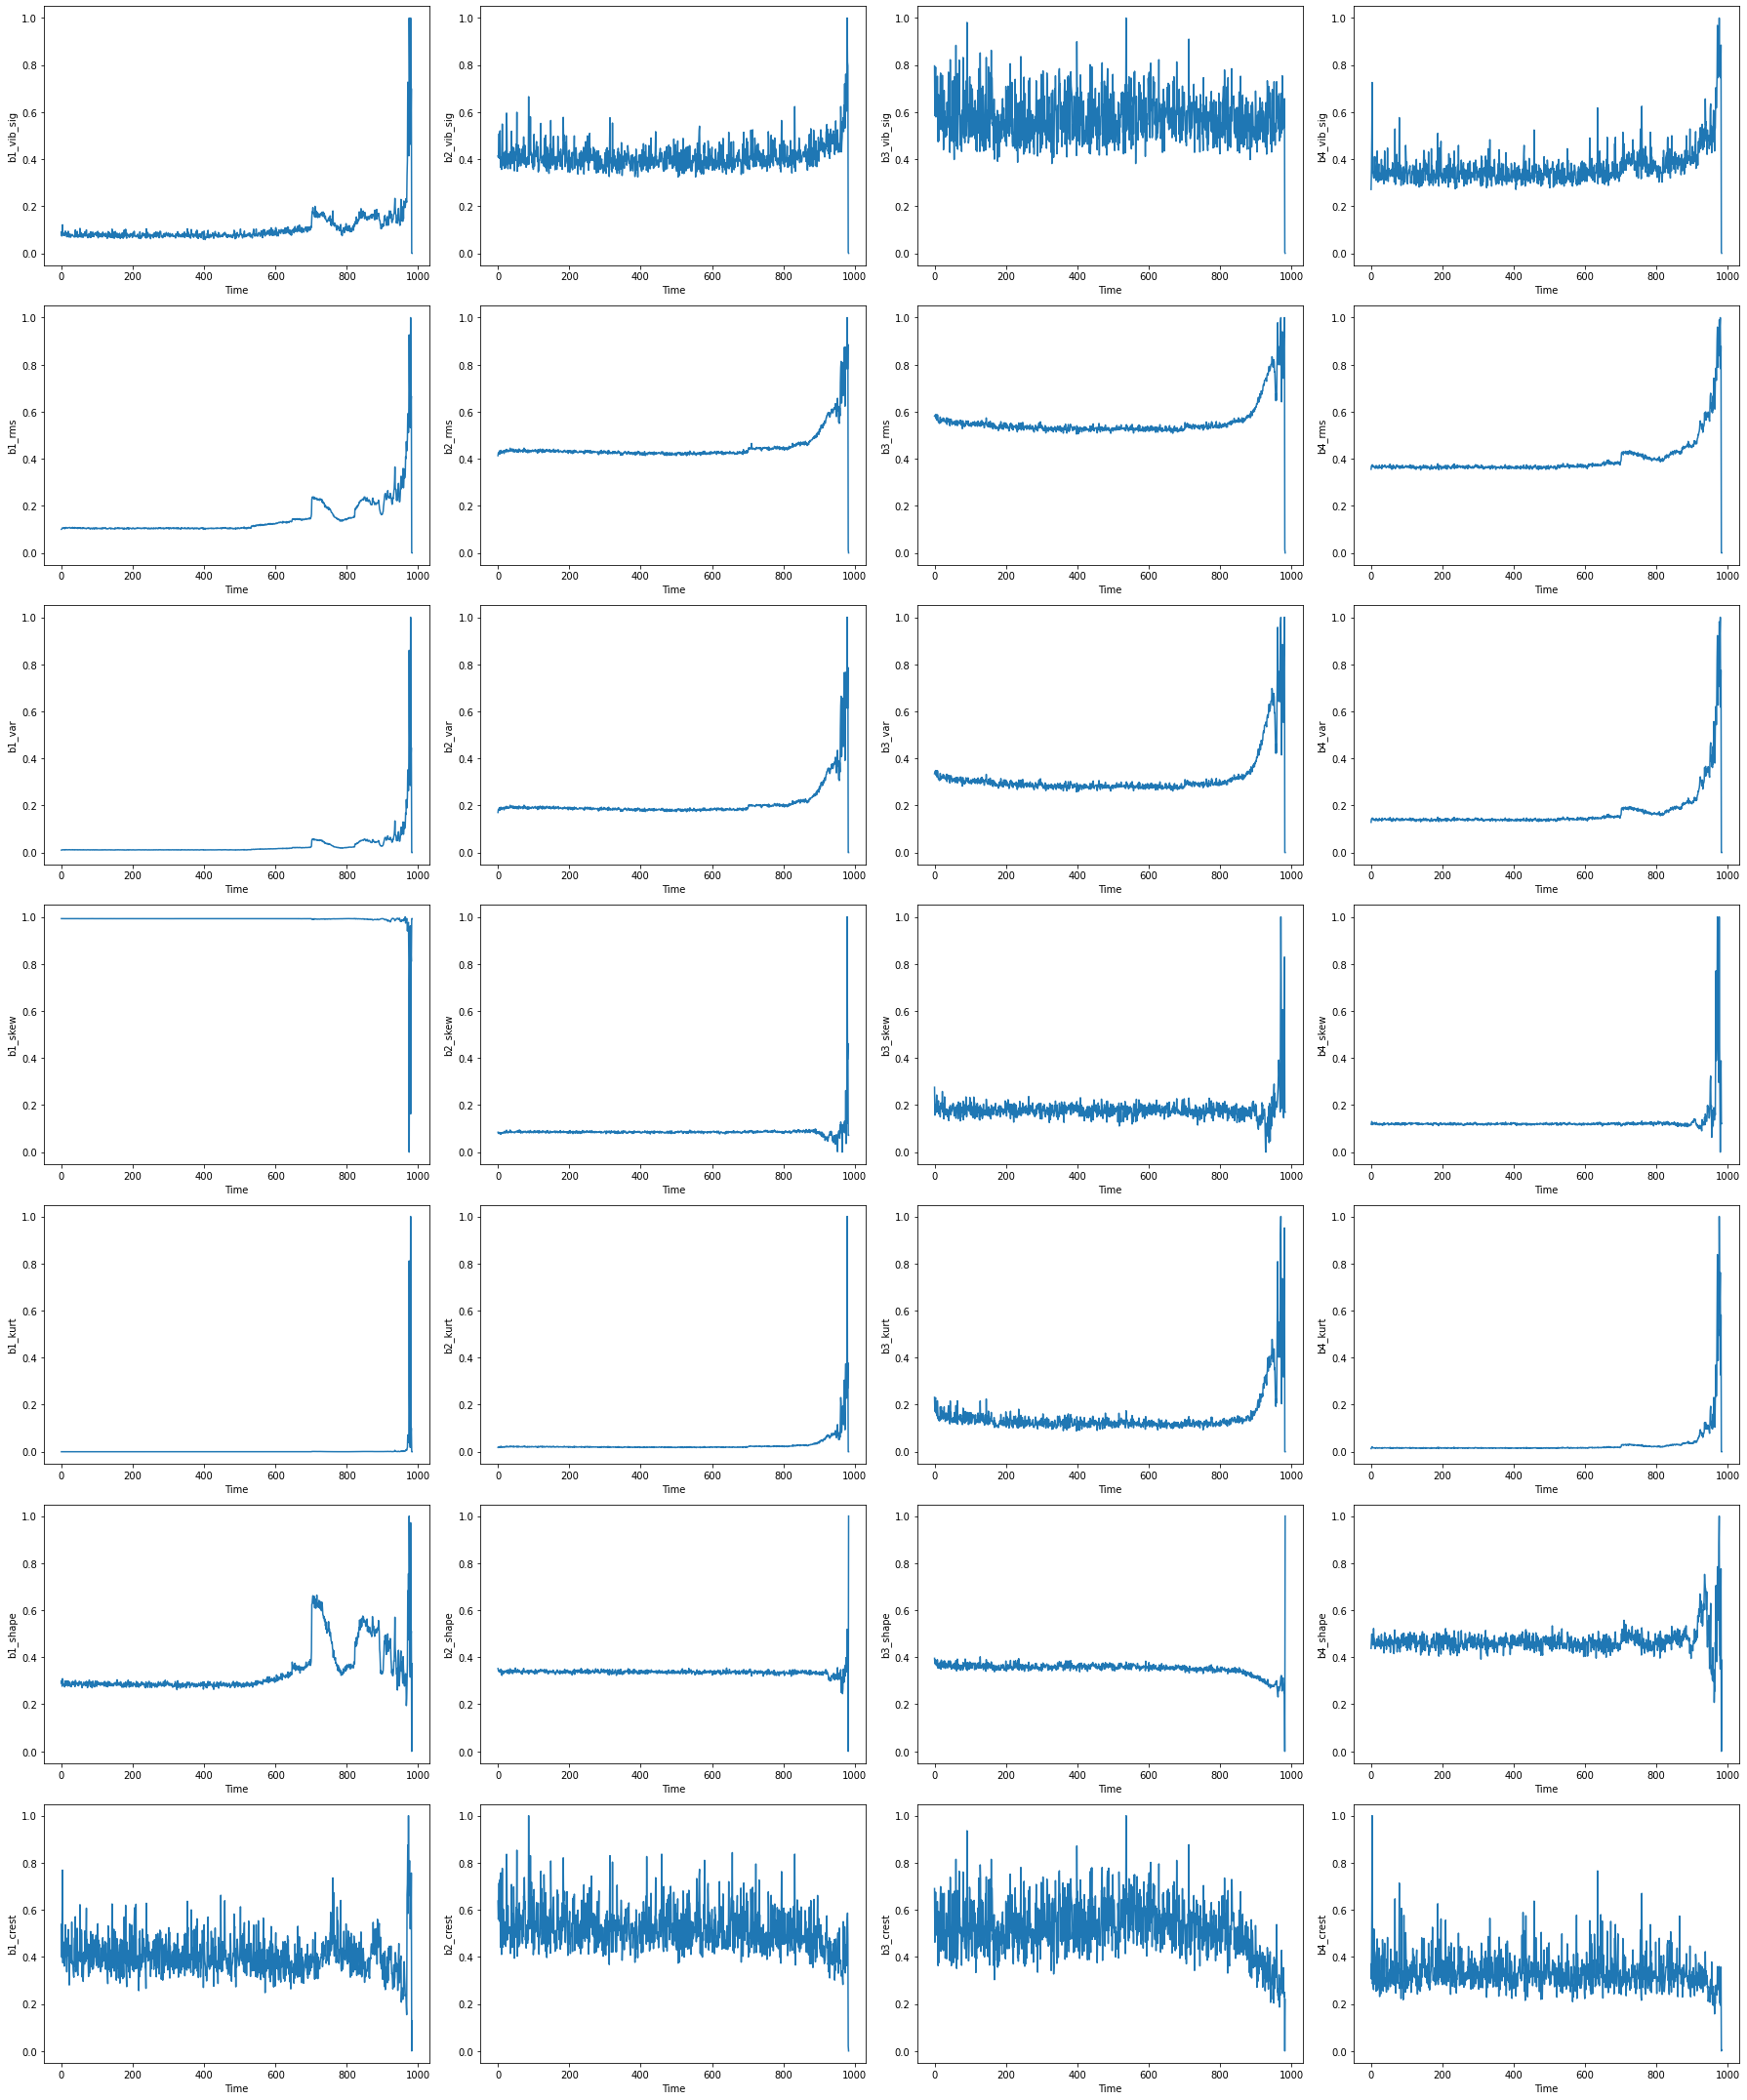

In [18]:
plot_features(df_normalized)

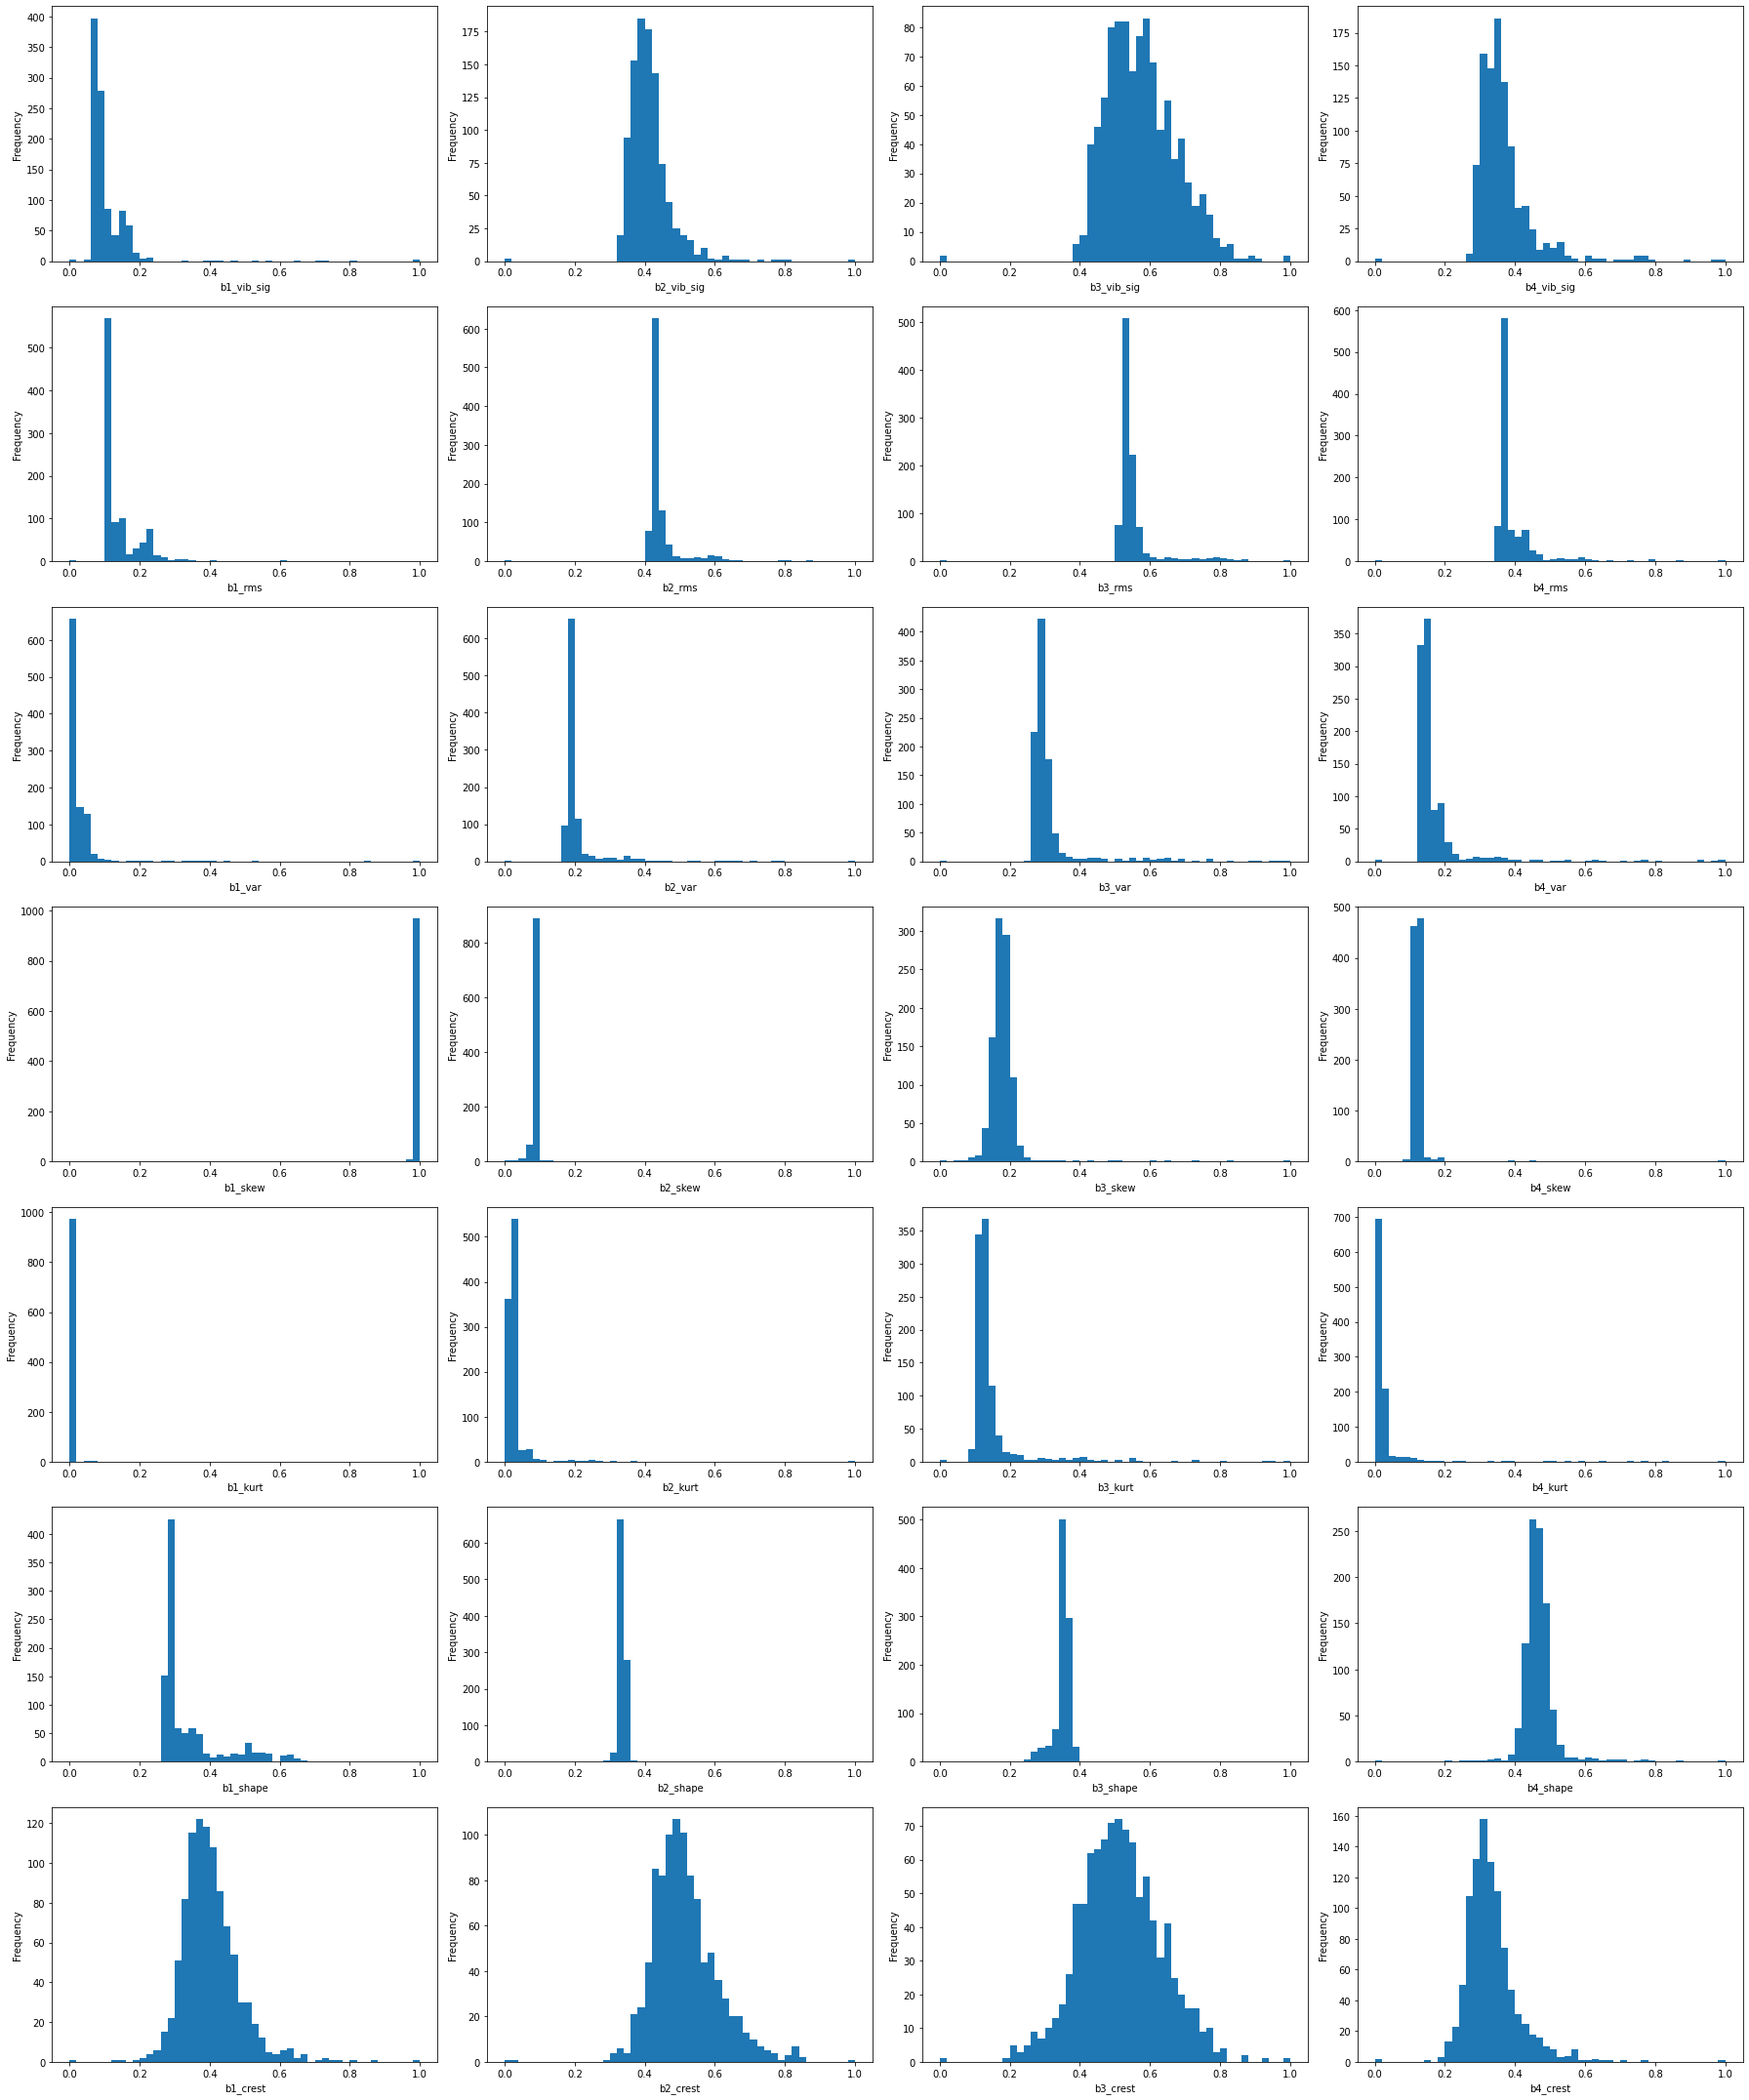

In [19]:
hist_features(df_normalized)

**Analysis**

General:
* All the features seems likely to be useful. Interestingly, the features relating to bearing 2, 3, and 4 all tend to be correlated with the failure of bearing 1. We will leave these features in for now.

* We notice that there is a long healthy phase before we start seeing more extreme behaviour across all plots. In the assignment outline, it is given that we can assume the presence of a model which will discern whether we are in the healthy phase or the unhealthy phase. We are only concerned with predicting the RUL in the unhealthy phase. Across all plots we start to notice divergent behaviour around time 600. As such we will remove all observations prior to time 600, as we can assume an existing binary classification model would have not have fed these observations to our model in the first place.

Plots:

* Across plots we notice a similar pattern of behaviour, where the feature values oscillate periodically with approximately fixed variance. As the RUL gets smaller, we start to see more extreme positive values (or negative values in the case of b1_skew).

* Also, around when bearing 1 breaks (RUL very small), all features drop to 0, as the machine is now broken!

* Across all features we notice increases in variability occur around time 700 (ie. RUL 177000) that are small relative to the large increases seen closer to RUL 0. These spikes in variability seem to act as precursers to imminent failure and will likely be useful in predicting when to change a bearing. We are careful to set our clamp values to be higher than the peak of these early spikes in variability so the model can differentiate between these and the end of life spikes.

* Normalizing the data causes the values of our observations to be measured as number of standard deviations away from the mean, but the overall time series shape remains unchanged.

Histograms:

* Most of our features (with the exception of crest factor) seem to be approximately exponentially or negative-exponentially distributed. Vibrational, RMS, and Shape factor would appear to be exponentially distributed if not for some observations at the end of the distribution which dip down to 0. We could clamp these values but instead decide to leave them in as observing these relatively low values is a good indicator that RUL is very low.

* Crest factor appears to be normally distributed across all channels

* The Vibration Signal for bearing 3 appears to be approximately normally distributed.

* Normalizing the data causes our histograms to be mean centered with unit standard deviation, but the frequency measurements remain unchanged.

Normalizing:
* We will normalize as features are on different scales otherwise.


### (1d) Preprocessing

In [20]:
df_final = df_normalized.copy()
df_final = df_final[600:]
# df_final = df.copy()
features = df_final.columns.tolist()
features.remove('rul')
for feature in features:
  mean = df_final[feature].mean()
  std_dev = df_final[feature].std()
  if feature == 'b1_skew':
    clamp_val = mean - (2 * std_dev)
    df_final[feature] = df_final[feature].clip(lower=clamp_val)
  else:
    clamp_upper = mean + (2 * std_dev)
    clamp_lower = mean - (2 * std_dev)
    df_final[feature] = df_final[feature].clip(upper=clamp_upper)
    df_final[feature] = df_final[feature].clip(lower=clamp_lower)

In [21]:
display(df_final)

,b1_vib_sig,b1_rms,b1_var,b1_skew,b1_kurt,b1_shape,b1_crest,b2_vib_sig,b2_rms,b2_var,b2_skew,b2_kurt,b2_shape,b2_crest,b3_vib_sig,b3_rms,b3_var,b3_skew,b3_kurt,b3_shape,b3_crest,b4_vib_sig,b4_rms,b4_var,b4_skew,b4_kurt,b4_shape,b4_crest,rul
0,0.098879,0.123823,1.578752e-02,0.992325,5.668572e-05,0.305633,0.440806,0.450717,0.423996,0.182499,0.085939,1.960477e-02,0.340776,0.601675,0.693448,0.533722,0.288016,0.199202,1.143084e-01,0.340301,0.645418,0.350852,0.373123,0.145608,0.120863,1.760200e-02,0.476750,0.299285,229800
0,0.109087,0.126657,1.650563e-02,0.992253,6.229114e-05,0.299137,0.502285,0.353047,0.421899,0.180707,0.086406,1.817854e-02,0.324216,0.419923,0.757821,0.516677,0.270074,0.163628,1.329100e-01,0.377312,0.720158,0.379261,0.366609,0.140738,0.120857,1.585030e-02,0.403676,0.361992,229200
0,0.089071,0.124992,1.608099e-02,0.992241,5.636942e-05,0.297985,0.357008,0.403226,0.423457,0.182030,0.087160,1.958916e-02,0.340445,0.512662,0.757821,0.520223,0.273755,0.209178,1.092753e-01,0.352676,0.720158,0.322443,0.362954,0.138045,0.120181,1.549057e-02,0.466615,0.264026,228600
0,0.100280,0.125329,1.616461e-02,0.992404,6.280287e-05,0.324861,0.442473,0.374552,0.427153,0.185187,0.088304,1.962725e-02,0.338442,0.452172,0.620905,0.523383,0.277119,0.185167,1.059639e-01,0.347291,0.575306,0.312500,0.369560,0.143001,0.120967,1.652003e-02,0.456069,0.261433,228000
0,0.073859,0.124811,1.603265e-02,0.991997,5.862083e-05,0.316787,0.350173,0.359319,0.423728,0.182232,0.088312,1.928669e-02,0.340238,0.432336,0.491420,0.522017,0.275618,0.161259,1.176981e-01,0.365733,0.507793,0.365057,0.368934,0.142390,0.118884,1.645978e-02,0.459341,0.419615,227400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.352169,0.411350,2.274248e-01,0.845882,1.414163e-01,0.656580,0.590069,0.585326,0.681979,0.474815,0.199196,1.807242e-01,0.417232,0.555298,0.533541,0.805296,0.642528,0.145770,4.412242e-01,0.271629,0.249202,0.618835,0.681317,0.494459,0.000000,2.844065e-01,0.349711,0.194412,2400
0,0.352169,0.411350,2.274248e-01,0.855402,7.155306e-02,0.491363,0.554684,0.585326,0.681979,0.474815,0.199196,1.807242e-01,0.396851,0.586034,0.594384,0.805296,0.642528,0.348612,4.412242e-01,0.247452,0.236604,0.618835,0.681317,0.494459,0.257067,2.844065e-01,0.521734,0.317472,1800
0,0.352169,0.411350,2.274248e-01,0.845882,1.004863e-01,0.511047,0.590069,0.585326,0.681979,0.474815,0.199196,1.807242e-01,0.362641,0.472923,0.657566,0.805296,0.642528,0.348612,4.412242e-01,0.267586,0.249266,0.618835,0.681317,0.494459,0.335000,2.844065e-01,0.637592,0.356154,1200
0,0.000600,0.000788,0.000000e+00,0.992261,1.143111e-12,0.197774,0.199143,0.269116,0.284458,0.017055,0.071600,2.815528e-10,0.251576,0.298511,0.385701,0.366566,0.073842,0.169858,9.246016e-10,0.242345,0.236604,0.196565,0.215492,0.000000,0.121216,0.000000e+00,0.317852,0.168864,600


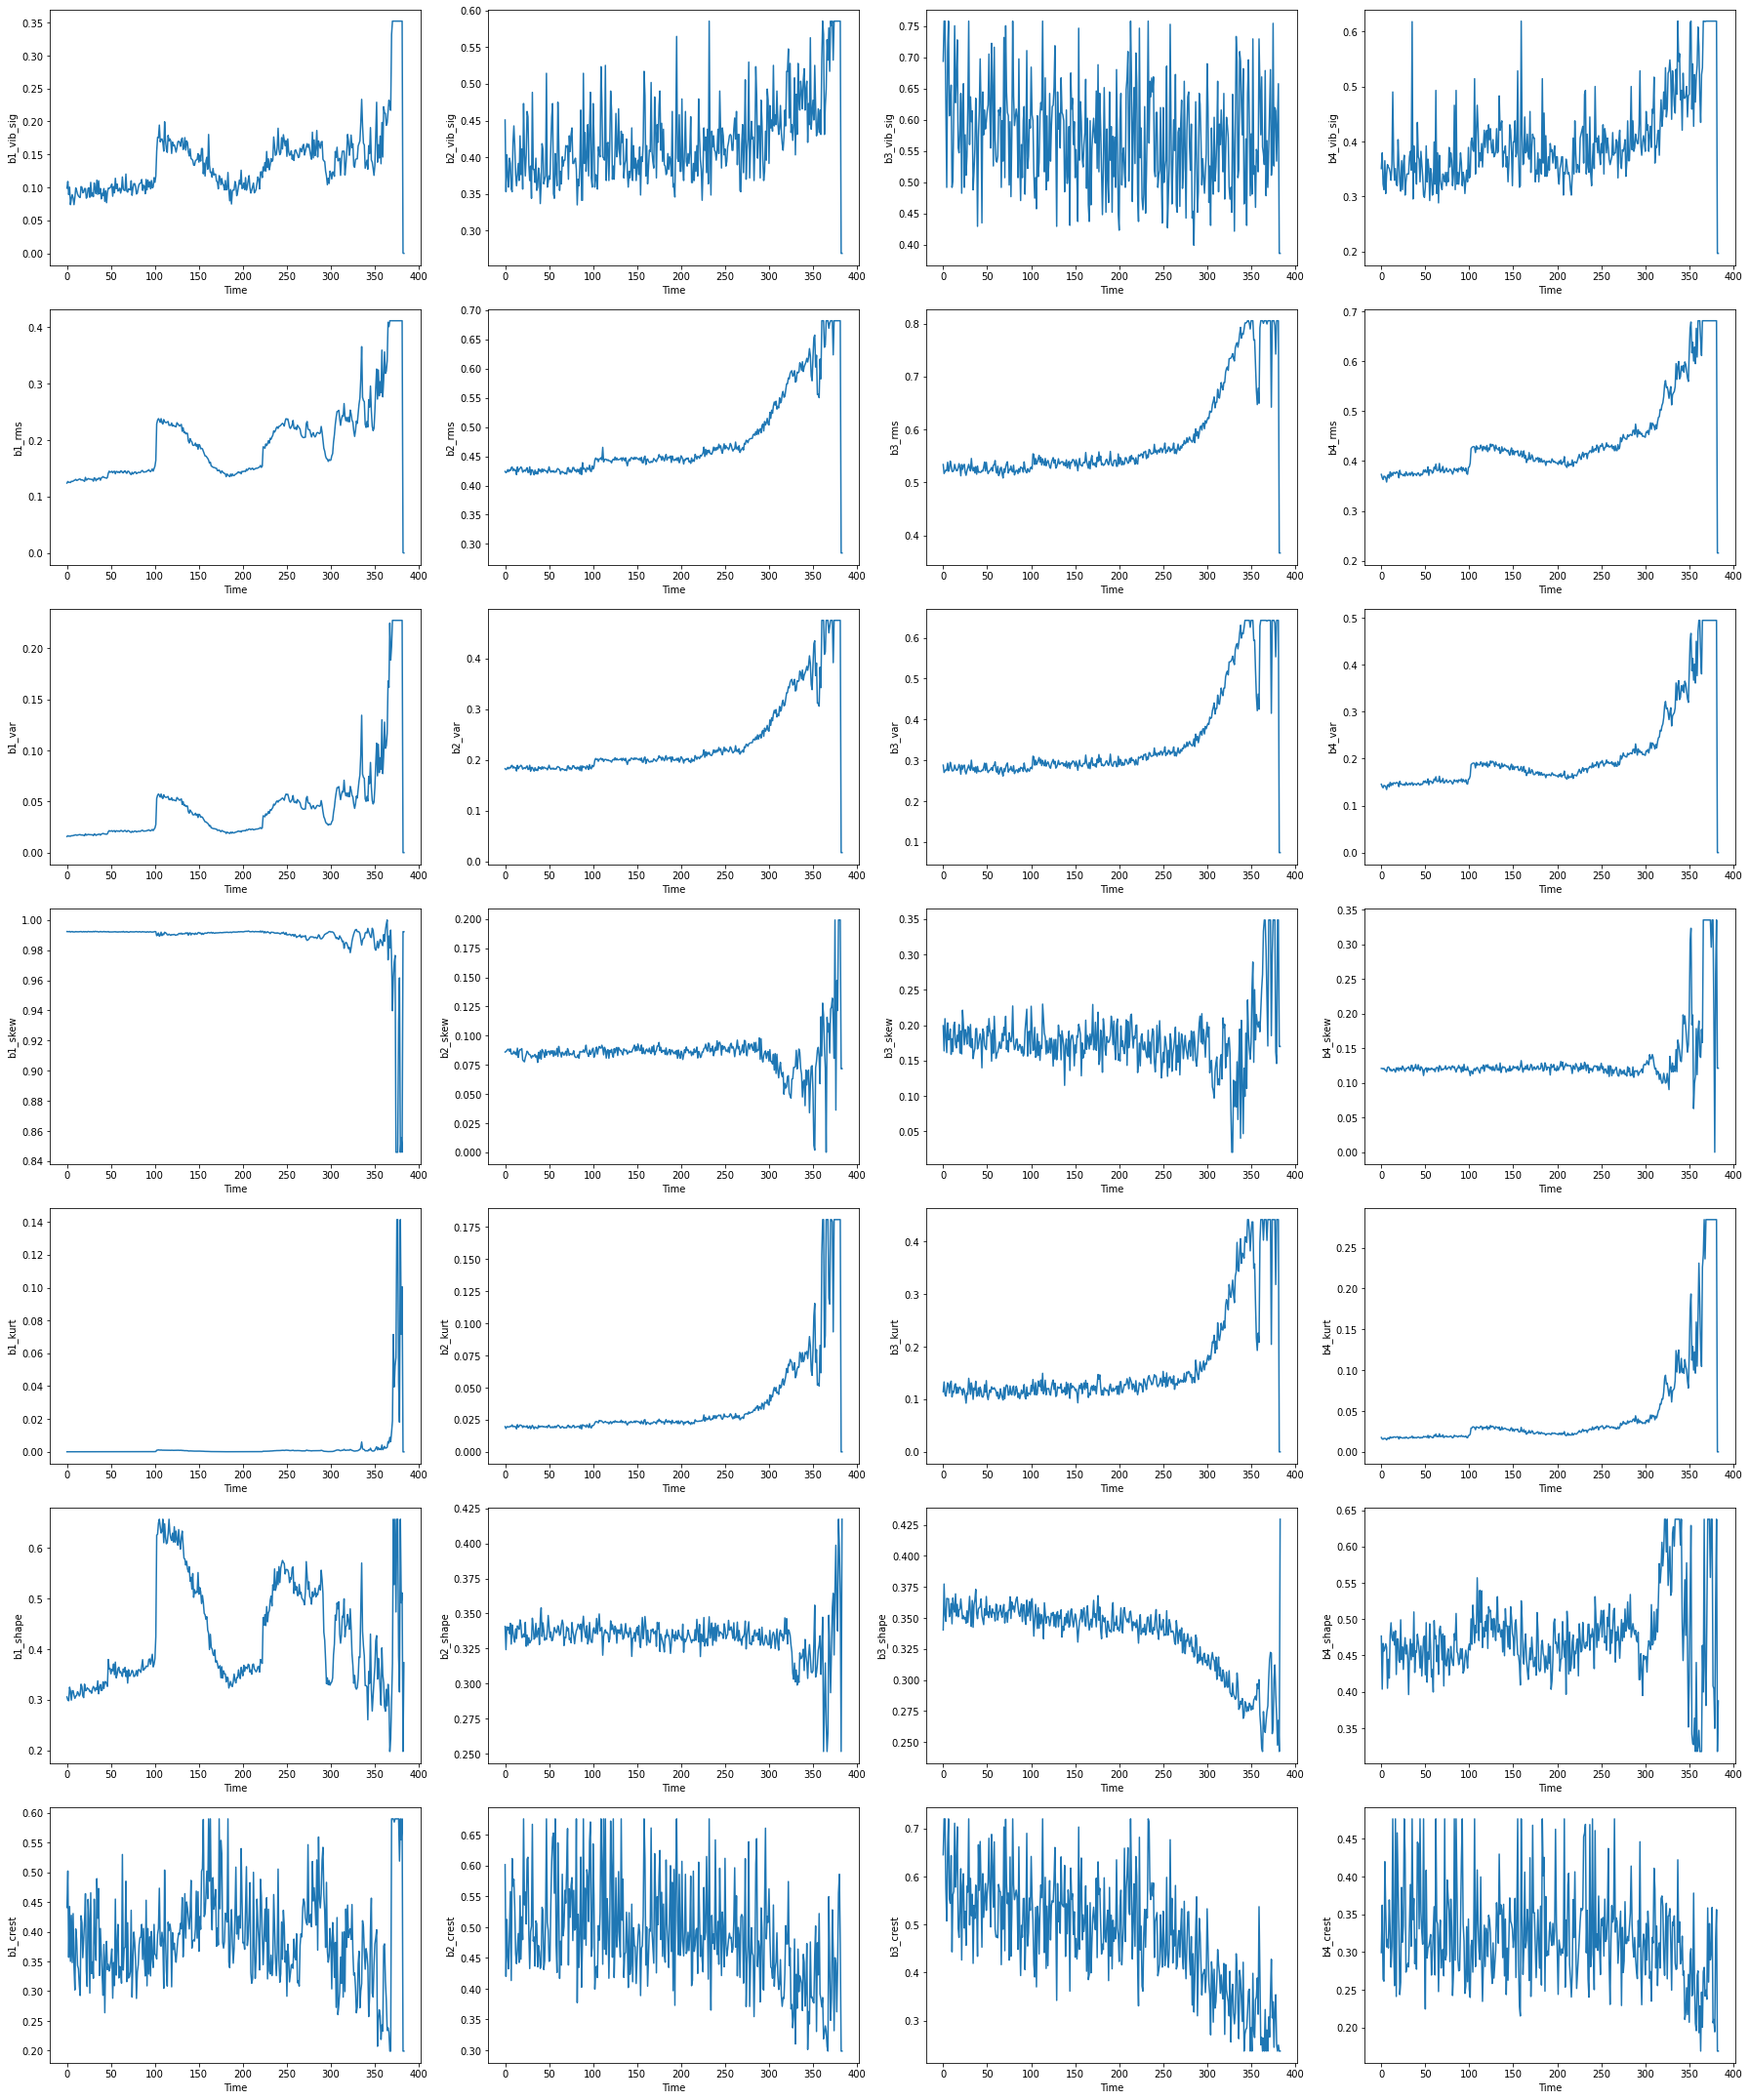

In [22]:
plot_features(df_final)

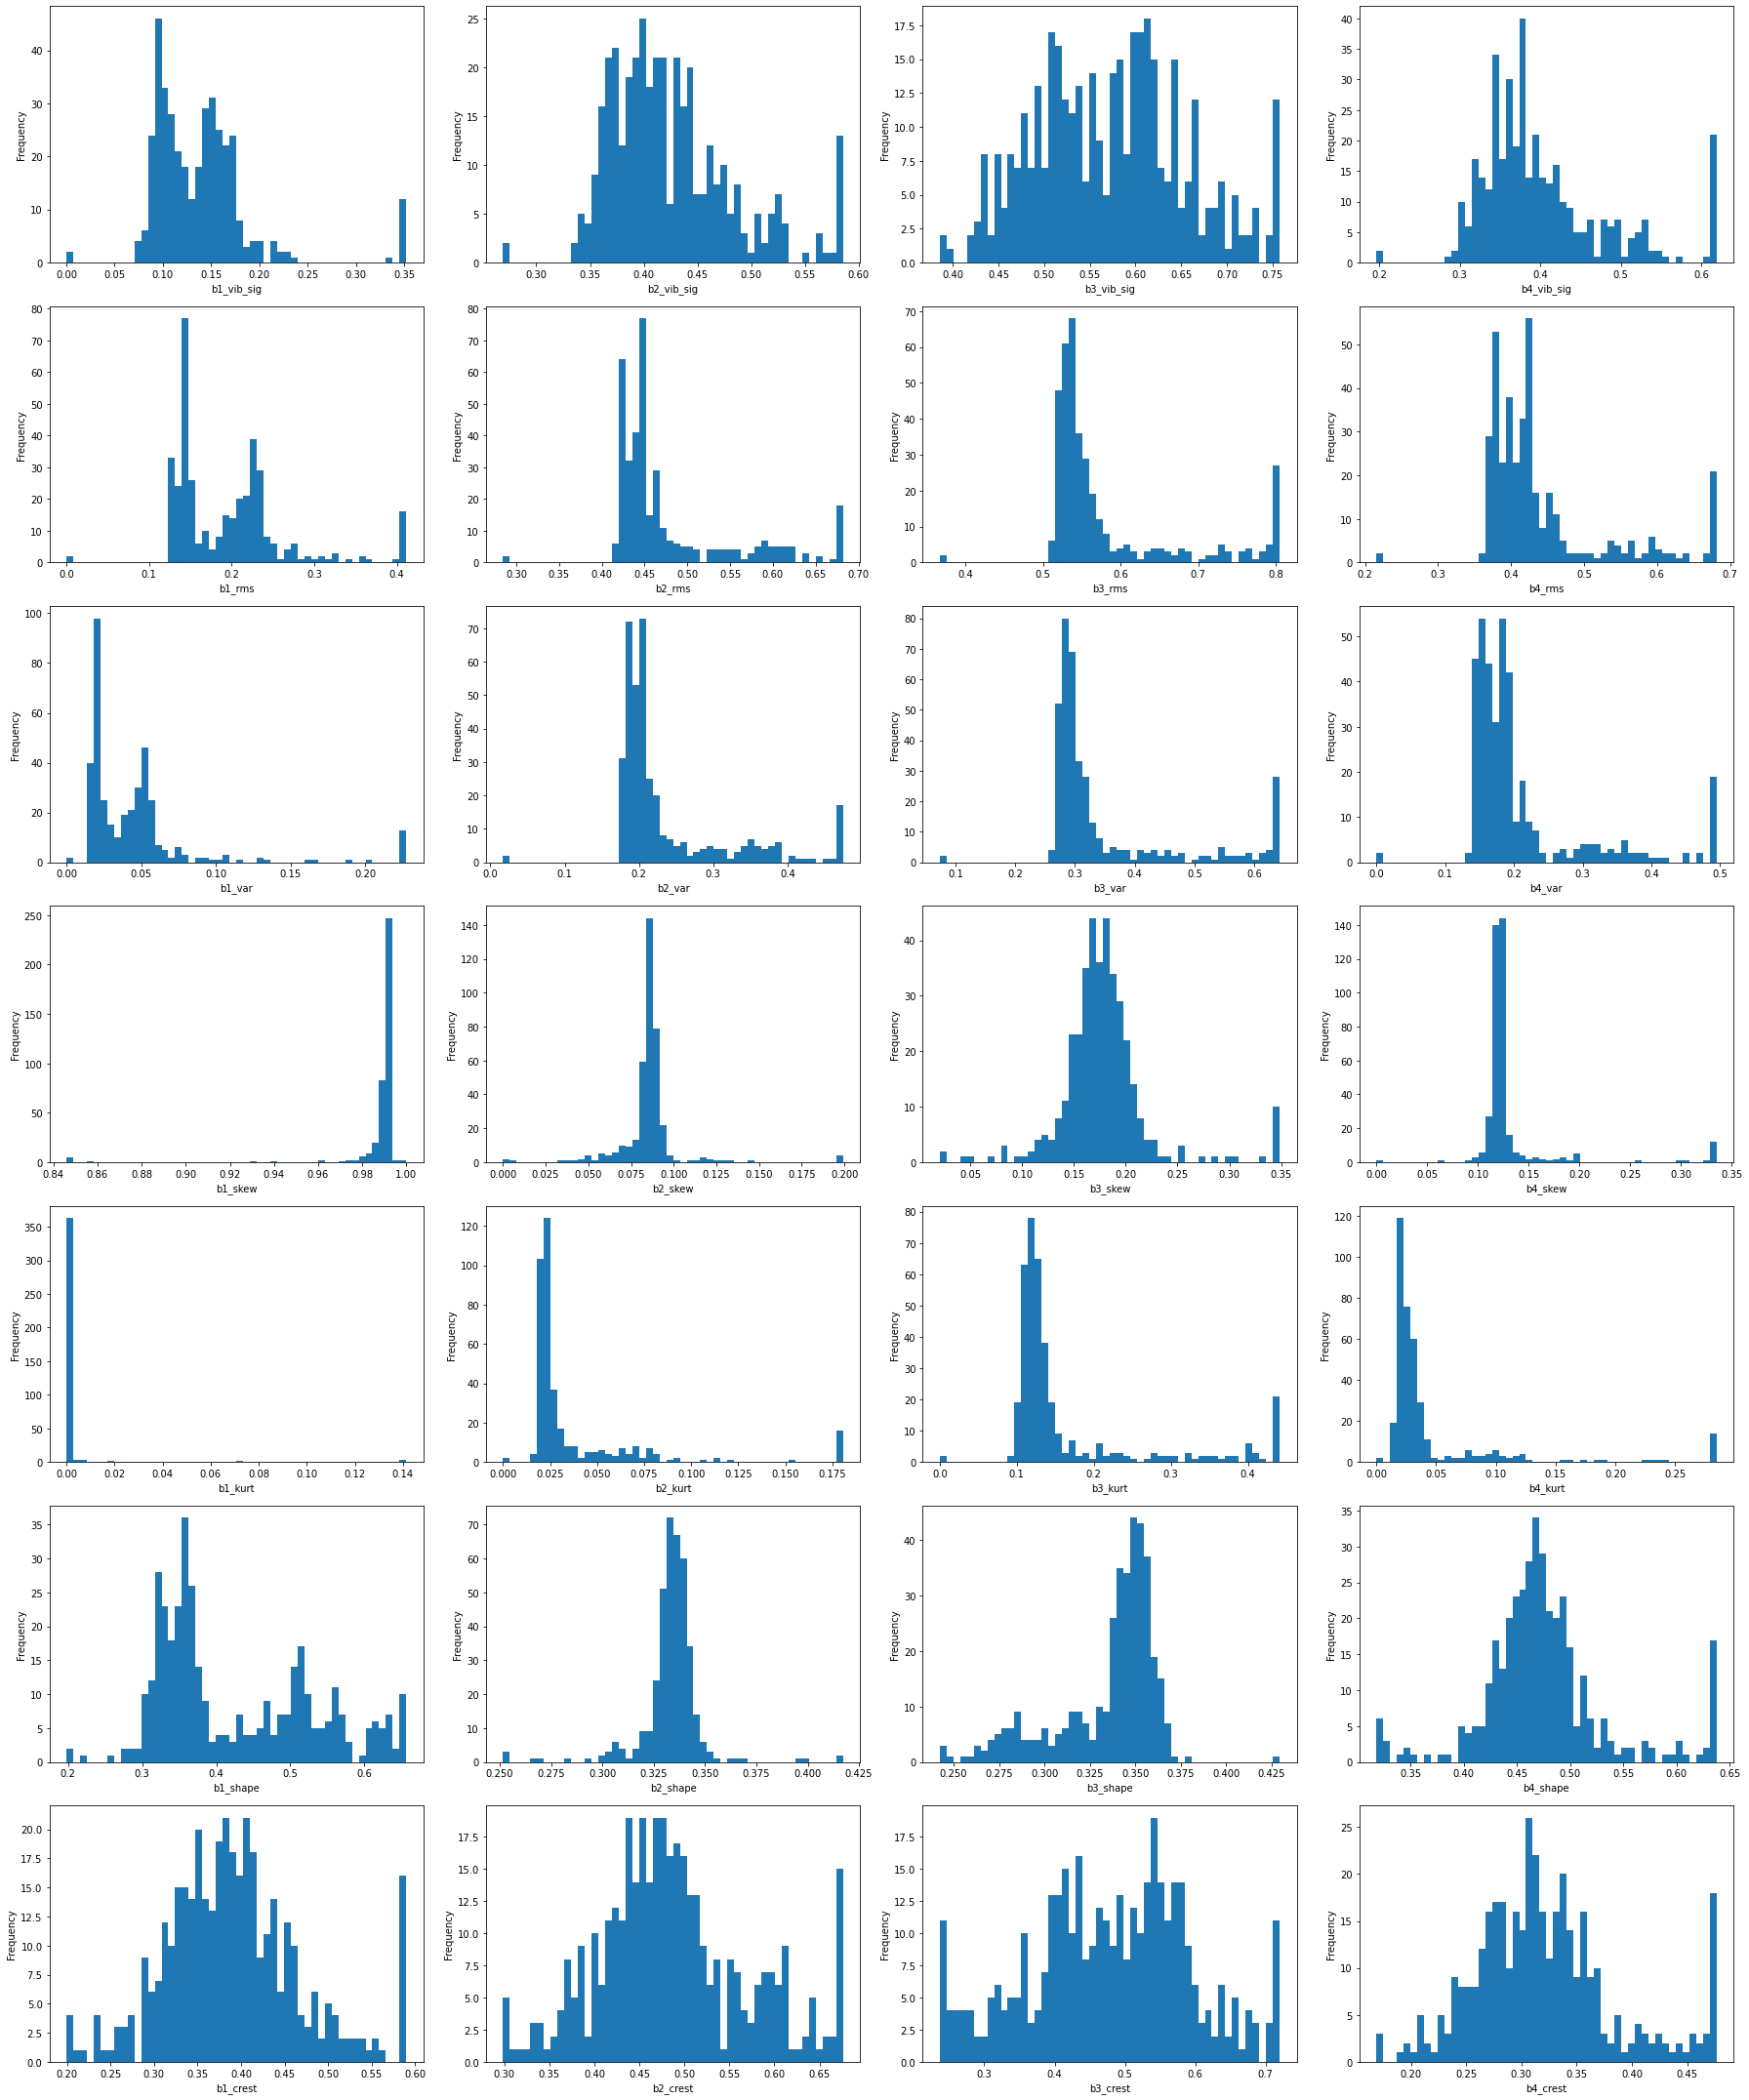

In [23]:
hist_features(df_final)

# 2) Baseline Model

### (2a) Task

Our target value is continuous (the RUL for bearing 1, in seconds), so we are concerned with solving a regression problem. We have labels for all data samples, so our task is supervised. Thus we are solving a supervised regression problem.

### (2b) Feature Selection

In [24]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression

def feature_select(df_curr):

  features = df_curr.columns.tolist()  
  features.remove('rul')

  X=df_curr.copy()
  X = X.drop(['rul'], axis =1)
  y=df_curr.copy()
  y= y['rul']
  selector = SelectKBest(mutual_info_regression, k=len(features)).fit(X,y)
  column_names= X.columns[selector.get_support()].to_list()
  rows = int(len(features) / 4)
  fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(25, 30), squeeze=False)

  for i, feature in enumerate(features):
    time = np.arange(df_curr.shape[0])
    axes[int(i%rows)][int(i/rows)].scatter(df_curr[feature], df_curr['rul'], s=4)
    axes[int(i%rows)][int(i/rows)].set_xlabel(feature)
    axes[int(i%rows)][int(i/rows)].set_ylabel('RUL')
    mi_index=column_names.index(feature)
    axes[int(i%rows)][int(i/rows)].set_title("Correlation: {}. MI: {}".format(round(df_curr[feature].corr(df_curr['rul']), 3), round(selector.scores_[mi_index],3)))
  fig.tight_layout()

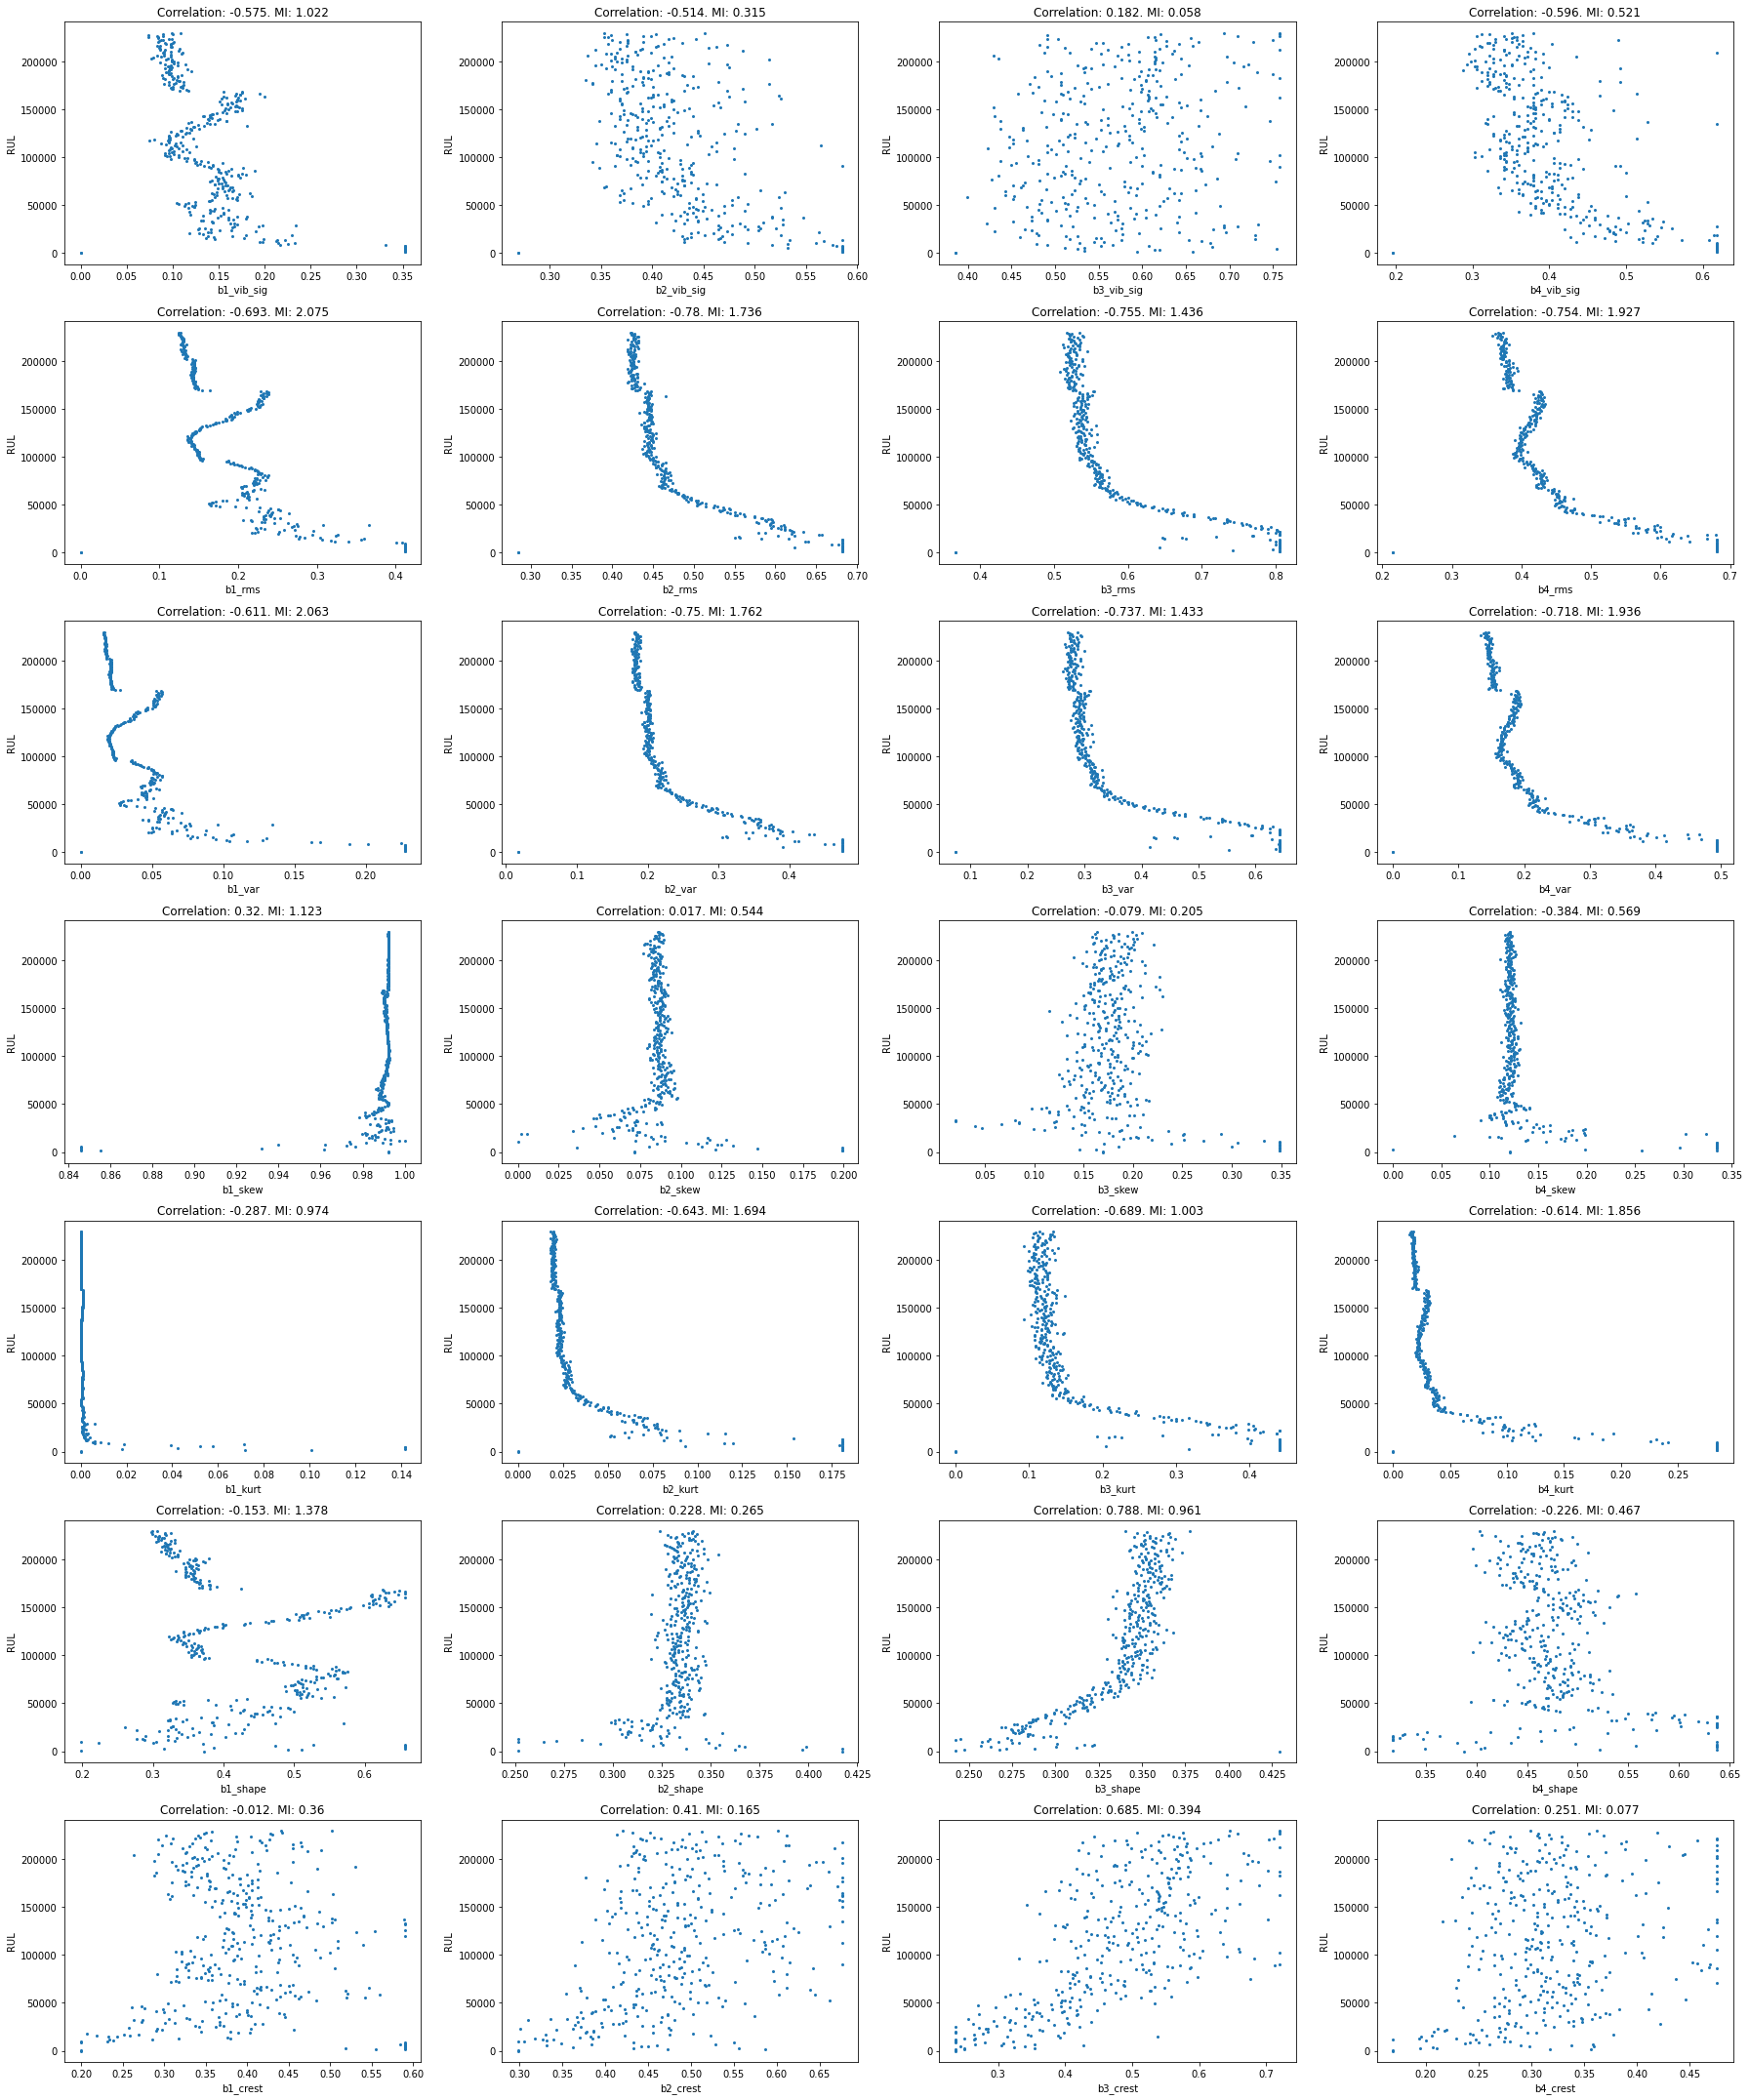

In [25]:
df_test = df_final.copy()
feature_select(df_test)

According to the correlation and mutual information regression value we will observe that some values are better predictors than other values. The Pearson correlation measures the strength of linear relationships and mutual information measures the strength of non linear relationships. 

We have decided against using multiple regression, as one of the underlying assumptions is multi-colinearity, i.e. that all independent variables are mutually un-correlated. This is of course violated, as vibrations from one bearing can be picked up by sensors for the other bearings, and we can see correlated behaviour simply by looking at the plots.

We instead intend to use the XGboost model, which has automatic feature detection during training. As such we intend to use as many relevant variables as possible in this step and we will only remove features that provide no descriminative information. 

**Using only bearing 1 features:**
* We can see that all bearing 1 features have high Pearson correlation and/or high mutual information, with the exception of crest.

* We notice thought that there does seem to be some relationship between crest and RUL. Because we have relatively few features to begin with, we would suggest leaving this in.

* One major problem with this approach is that, if we feed in a data set with a bearing other than bearing 1 that fails (as we are asked to do in question 3), the bearing 1 features will be much less relevant, and we will have thrown away other potentially useful features.

**Using all features:**
* This approach is better suited to dealing with other data sets where other bearings fail.

* We point out though that certain features provide almost no useful information and are seemingly randomly distributed. These features can be removed as they likely have no disriminative power.

**Using a subset of features:**
* With respect to the vibration signal feature, we will keep the vibrational signal measurement for bearings 1, 2, and 4 and remove the signal from bearing 3. Bearing 3 has low pearson correlation and mutual information. There does not appear to be a strong dependency between the vibration signal of bearing 3 and RUL. 
* There is a significant amount of redundancy between the variance and RMS plots. We will keep both because both have high information, and we will allow XGboost to decide which to keep. We also point out that the bearing 3 readings for these two features exhibit parabolic behavior and may be useful for helping the model identify accurate RUL values for high RUL. 
* We will remove the skew features for bearings 2, 3, and 4 as the skew value is approximately uniformely distributed up until small RUL values. Bearing 1 exhibits similar behaviour but strarts to show some variation earlier. 
* We have elected to keep all kurtosis values for all bearings. Because they have high information. 
* For shape we remove the features for bearings 2 and 4 for the same reasons as skew.
* We will remove the crest feature for bearing 4 because it has low information and low pearson correlation. The others also seem to have less information relative to features other than crest, but we will leave these in as these does seem to be some correlation between them and RUL. We will allow XGboost to decide if it wants to use these.

In [101]:
display(df_final)
drop_features = ['b3_vib_sig','b2_skew','b3_skew','b4_skew','b2_shape','b4_shape', 'b4_crest']
df_final = df_final.drop(drop_features, axis=1)
display(df_final)

,b1_vib_sig,b1_rms,b1_var,b1_skew,b1_kurt,b1_shape,b1_crest,b2_vib_sig,b2_rms,b2_var,b2_skew,b2_kurt,b2_shape,b2_crest,b3_vib_sig,b3_rms,b3_var,b3_skew,b3_kurt,b3_shape,b3_crest,b4_vib_sig,b4_rms,b4_var,b4_skew,b4_kurt,b4_shape,b4_crest,rul
0,0.098879,0.123823,1.578752e-02,0.992325,5.668572e-05,0.305633,0.440806,0.450717,0.423996,0.182499,0.085939,1.960477e-02,0.340776,0.601675,0.693448,0.533722,0.288016,0.199202,1.143084e-01,0.340301,0.645418,0.350852,0.373123,0.145608,0.120863,1.760200e-02,0.476750,0.299285,229800
0,0.109087,0.126657,1.650563e-02,0.992253,6.229114e-05,0.299137,0.502285,0.353047,0.421899,0.180707,0.086406,1.817854e-02,0.324216,0.419923,0.757821,0.516677,0.270074,0.163628,1.329100e-01,0.377312,0.720158,0.379261,0.366609,0.140738,0.120857,1.585030e-02,0.403676,0.361992,229200
0,0.089071,0.124992,1.608099e-02,0.992241,5.636942e-05,0.297985,0.357008,0.403226,0.423457,0.182030,0.087160,1.958916e-02,0.340445,0.512662,0.757821,0.520223,0.273755,0.209178,1.092753e-01,0.352676,0.720158,0.322443,0.362954,0.138045,0.120181,1.549057e-02,0.466615,0.264026,228600
0,0.100280,0.125329,1.616461e-02,0.992404,6.280287e-05,0.324861,0.442473,0.374552,0.427153,0.185187,0.088304,1.962725e-02,0.338442,0.452172,0.620905,0.523383,0.277119,0.185167,1.059639e-01,0.347291,0.575306,0.312500,0.369560,0.143001,0.120967,1.652003e-02,0.456069,0.261433,228000
0,0.073859,0.124811,1.603265e-02,0.991997,5.862083e-05,0.316787,0.350173,0.359319,0.423728,0.182232,0.088312,1.928669e-02,0.340238,0.432336,0.491420,0.522017,0.275618,0.161259,1.176981e-01,0.365733,0.507793,0.365057,0.368934,0.142390,0.118884,1.645978e-02,0.459341,0.419615,227400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.352169,0.411350,2.274248e-01,0.845882,1.414163e-01,0.656580,0.590069,0.585326,0.681979,0.474815,0.199196,1.807242e-01,0.417232,0.555298,0.533541,0.805296,0.642528,0.145770,4.412242e-01,0.271629,0.249202,0.618835,0.681317,0.494459,0.000000,2.844065e-01,0.349711,0.194412,2400
0,0.352169,0.411350,2.274248e-01,0.855402,7.155306e-02,0.491363,0.554684,0.585326,0.681979,0.474815,0.199196,1.807242e-01,0.396851,0.586034,0.594384,0.805296,0.642528,0.348612,4.412242e-01,0.247452,0.236604,0.618835,0.681317,0.494459,0.257067,2.844065e-01,0.521734,0.317472,1800
0,0.352169,0.411350,2.274248e-01,0.845882,1.004863e-01,0.511047,0.590069,0.585326,0.681979,0.474815,0.199196,1.807242e-01,0.362641,0.472923,0.657566,0.805296,0.642528,0.348612,4.412242e-01,0.267586,0.249266,0.618835,0.681317,0.494459,0.335000,2.844065e-01,0.637592,0.356154,1200
0,0.000600,0.000788,0.000000e+00,0.992261,1.143111e-12,0.197774,0.199143,0.269116,0.284458,0.017055,0.071600,2.815528e-10,0.251576,0.298511,0.385701,0.366566,0.073842,0.169858,9.246016e-10,0.242345,0.236604,0.196565,0.215492,0.000000,0.121216,0.000000e+00,0.317852,0.168864,600


,b1_vib_sig,b1_rms,b1_var,b1_skew,b1_kurt,b1_shape,b1_crest,b2_vib_sig,b2_rms,b2_var,b2_kurt,b2_crest,b3_rms,b3_var,b3_kurt,b3_shape,b3_crest,b4_vib_sig,b4_rms,b4_var,b4_kurt,rul
0,0.098879,0.123823,1.578752e-02,0.992325,5.668572e-05,0.305633,0.440806,0.450717,0.423996,0.182499,1.960477e-02,0.601675,0.533722,0.288016,1.143084e-01,0.340301,0.645418,0.350852,0.373123,0.145608,1.760200e-02,229800
0,0.109087,0.126657,1.650563e-02,0.992253,6.229114e-05,0.299137,0.502285,0.353047,0.421899,0.180707,1.817854e-02,0.419923,0.516677,0.270074,1.329100e-01,0.377312,0.720158,0.379261,0.366609,0.140738,1.585030e-02,229200
0,0.089071,0.124992,1.608099e-02,0.992241,5.636942e-05,0.297985,0.357008,0.403226,0.423457,0.182030,1.958916e-02,0.512662,0.520223,0.273755,1.092753e-01,0.352676,0.720158,0.322443,0.362954,0.138045,1.549057e-02,228600
0,0.100280,0.125329,1.616461e-02,0.992404,6.280287e-05,0.324861,0.442473,0.374552,0.427153,0.185187,1.962725e-02,0.452172,0.523383,0.277119,1.059639e-01,0.347291,0.575306,0.312500,0.369560,0.143001,1.652003e-02,228000
0,0.073859,0.124811,1.603265e-02,0.991997,5.862083e-05,0.316787,0.350173,0.359319,0.423728,0.182232,1.928669e-02,0.432336,0.522017,0.275618,1.176981e-01,0.365733,0.507793,0.365057,0.368934,0.142390,1.645978e-02,227400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.352169,0.411350,2.274248e-01,0.845882,1.414163e-01,0.656580,0.590069,0.585326,0.681979,0.474815,1.807242e-01,0.555298,0.805296,0.642528,4.412242e-01,0.271629,0.249202,0.618835,0.681317,0.494459,2.844065e-01,2400
0,0.352169,0.411350,2.274248e-01,0.855402,7.155306e-02,0.491363,0.554684,0.585326,0.681979,0.474815,1.807242e-01,0.586034,0.805296,0.642528,4.412242e-01,0.247452,0.236604,0.618835,0.681317,0.494459,2.844065e-01,1800
0,0.352169,0.411350,2.274248e-01,0.845882,1.004863e-01,0.511047,0.590069,0.585326,0.681979,0.474815,1.807242e-01,0.472923,0.805296,0.642528,4.412242e-01,0.267586,0.249266,0.618835,0.681317,0.494459,2.844065e-01,1200
0,0.000600,0.000788,0.000000e+00,0.992261,1.143111e-12,0.197774,0.199143,0.269116,0.284458,0.017055,2.815528e-10,0.298511,0.366566,0.073842,9.246016e-10,0.242345,0.236604,0.196565,0.215492,0.000000,0.000000e+00,600


### (2c) Select the evaluation metric. Justify your choice.

We will use the root mean squared error for our evaluation metric. The mean squared error is appropriate for regression tasks such as ours (it is a continuous analogue to the sum of squared errors often utilized by classification models), but the MSE is not easy for us to interpret during training, besides knowing that smaller is better. The root MSE makes our evaluation metric a little more readible, as the error value will be in the same units as our target variable (ie. seconds).

### (2d) Perform hyperparameter tuning if applicable.

In [96]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import math


# Trains our model
def train(x_tr, y_tr, params, x_te=None, y_te=None, cv=0, test=False):
  data_dmatrix = xgb.DMatrix(data=x_tr,label=y_tr)
  
  xg_reg = xgb.XGBRegressor(
      objective=params['objective'],
      colsample_bytree=params['colsample_bytree'],                 
      learning_rate=params['learning_rate'],
      max_depth=params['max_depth'],
      min_child_weight=1.5,
      n_estimators=1000,
      reg_lambda=params['reg_lambda'],
      subsample=0.6,
      seed=42
      ) 
  
  if cv > 0:
    kfold = KFold(n_splits=cv, random_state=0, shuffle=True)
    results = cross_val_score(xg_reg, x_tr, y_tr, cv=kfold, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-1 * results.mean())

  else:
    xg_reg.fit(x_tr, y_tr)
    preds = xg_reg.predict(x_te)
    rmse = np.sqrt(mean_squared_error(y_te, preds))

  if test:
    return rmse, xg_reg
  else:
    return rmse

# Plotting results
def plot_search_results(grid_results_df):
  cols = 3
  fig, axes = plt.subplots(nrows=int(math.ceil(len(grid_results_df.columns) / cols)), ncols=cols, figsize=(20, 10), squeeze=False)

  for i, feature in enumerate(grid_results_df.columns):
    axes[int(i/cols)][int(i%cols)].scatter(grid_results_df[feature], grid_results_df['rmse'], s=4)
    axes[int(i/cols)][int(i%cols)].set_xlabel(feature)
    axes[int(i/cols)][int(i%cols)].set_ylabel('RMSE')
  fig.tight_layout()

In [28]:
from sklearn.model_selection import train_test_split

predictors = df_final.columns.tolist()
predictors.remove('rul')
X = df_final[[*predictors]].copy()
y = df_final['rul'].copy()

# First we run a search over our model hyper parameters, leaving our cross
# validation hyper-paramters fixed
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=100)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=100)

# Model hyper-parameters
grid = [{"objective":objective,
         "colsample_bytree":colsample_bytree,
         "learning_rate":learning_rate,
         "max_depth":max_depth,
         "reg_lambda":l2} 
        for objective in ['reg:squarederror'] 
        for colsample_bytree in [0.3, 0.6, 0.9, 1]
        for learning_rate in [0.5, 0.25, 0.1]
        for max_depth in [4, 8, 12]
        for l2 in [5, 10]]

# Grid search
grid_results = []
for params in grid:
  params['rmse'] = train(X_train_full, y_train_full, params, cv=10)
  grid_results.append(params)
  print(params)

grid_results_df = pd.DataFrame(grid_results)  

{'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.5, 'max_depth': 4, 'reg_lambda': 5, 'rmse': 13099.235190210986}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.5, 'max_depth': 4, 'reg_lambda': 10, 'rmse': 12368.292489413176}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.5, 'max_depth': 8, 'reg_lambda': 5, 'rmse': 13704.727396800461}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.5, 'max_depth': 8, 'reg_lambda': 10, 'rmse': 11757.326913581288}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.5, 'max_depth': 12, 'reg_lambda': 5, 'rmse': 13280.273356281748}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.5, 'max_depth': 12, 'reg_lambda': 10, 'rmse': 12059.805967887942}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.25, 'max_depth': 4, 'reg_lambda': 5, 'rmse': 11871.24309700598}
{

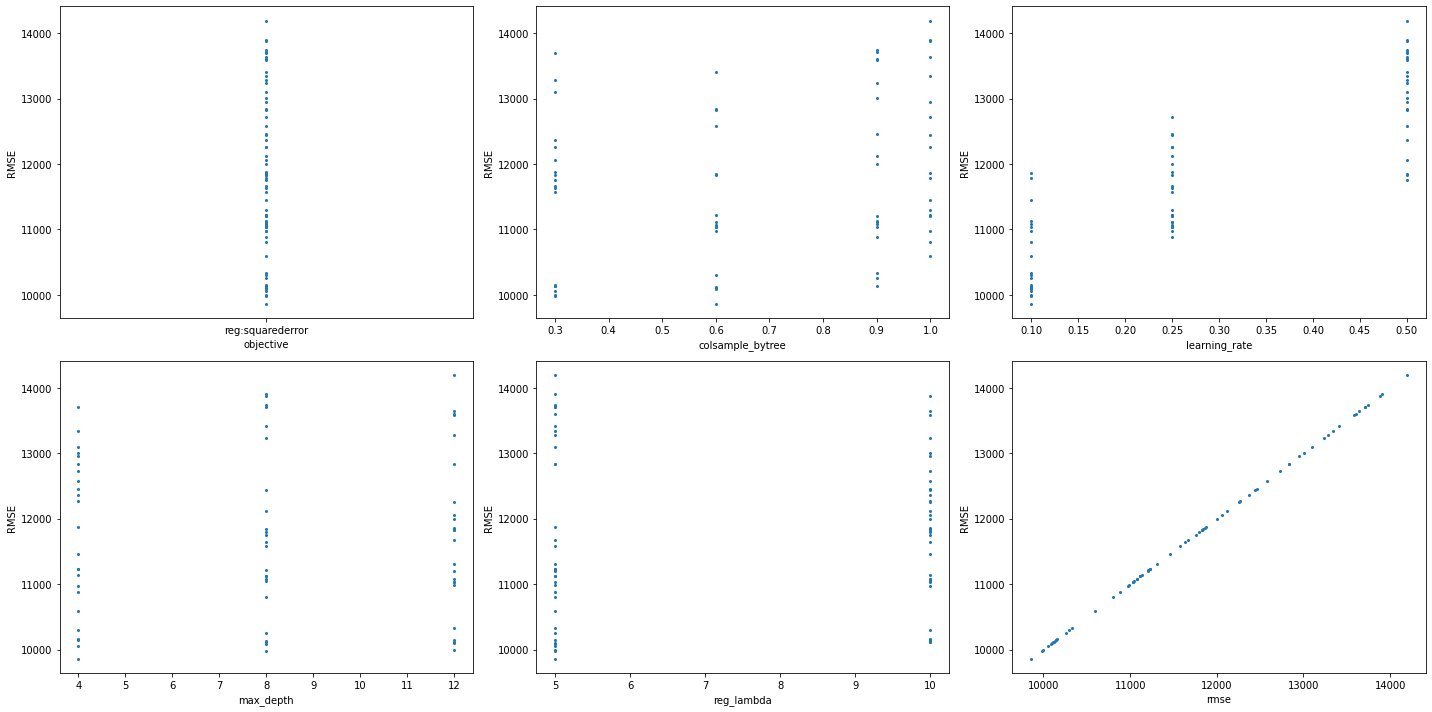

In [29]:
plot_search_results(grid_results_df)

In [30]:
# Narrowing our search
grid = [{"objective":objective,
         "colsample_bytree":colsample_bytree,
         "learning_rate":learning_rate,
         "max_depth":max_depth,
         "reg_lambda":l2} 
        for objective in ['reg:squarederror'] 
        for colsample_bytree in [0.5, 0.6, 0.7]
        for learning_rate in [0.1, 0.05, 0.01]
        for max_depth in [4, 5, 6]
        for l2 in [4, 6]]

grid_results = []
for params in grid:
  params['rmse'] = train(X_train_full, y_train_full, params, cv=10)
  grid_results.append(params)
  print(params)

grid_results_df = pd.DataFrame(grid_results)  

{'objective': 'reg:squarederror', 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 4, 'rmse': 9617.874277091389}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 6, 'rmse': 9830.675609580598}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 4, 'rmse': 9510.23052099435}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 6, 'rmse': 9842.598820392004}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'reg_lambda': 4, 'rmse': 9265.541481162863}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'reg_lambda': 6, 'rmse': 9826.395108978257}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 4, 'reg_lambda': 4, 'rmse': 9618.169911482857}
{'objective':

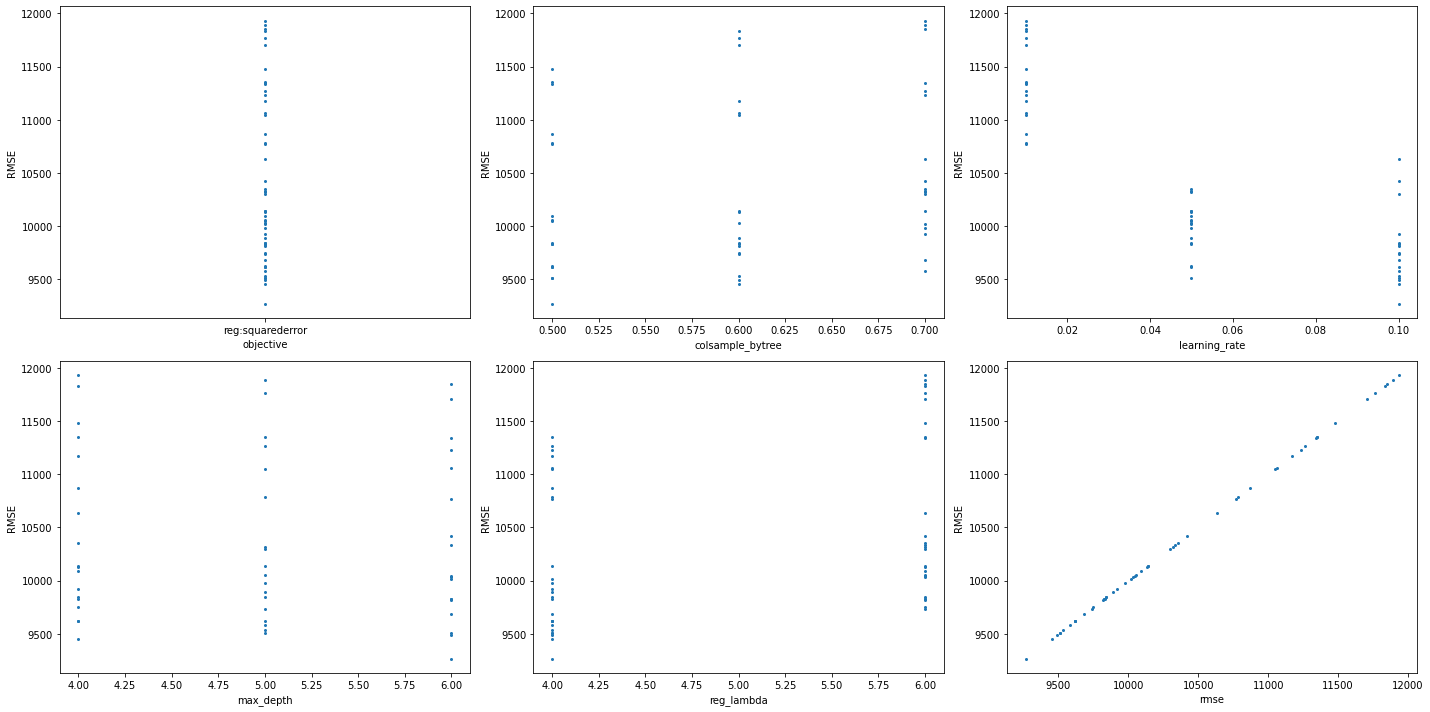

In [31]:
plot_search_results(grid_results_df)

In [35]:
# Narrowing our search
grid = [{"objective":objective,
         "colsample_bytree":colsample_bytree,
         "learning_rate":learning_rate,
         "max_depth":max_depth,
         "reg_lambda":l2} 
        for objective in ['reg:squarederror'] 
        for colsample_bytree in [0.1, 0.2, 0.3, 0.4, 0.5]
        for learning_rate in [0.05]
        for max_depth in [5]
        for l2 in [1, 2, 3, 4, 5]]

grid_results = []
for params in grid:
  params['rmse'] = train(X_train_full, y_train_full, params, cv=10)
  grid_results.append(params)
  print(params)

grid_results_df = pd.DataFrame(grid_results)  

{'objective': 'reg:squarederror', 'colsample_bytree': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 1, 'rmse': 11380.409510118123}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 2, 'rmse': 11328.464222789507}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 3, 'rmse': 11087.997451090234}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 4, 'rmse': 11049.83048162256}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 5, 'rmse': 11118.27215559936}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 1, 'rmse': 9042.214535854426}
{'objective': 'reg:squarederror', 'colsample_bytree': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 2, 'rmse': 9184.928307783497}
{'o

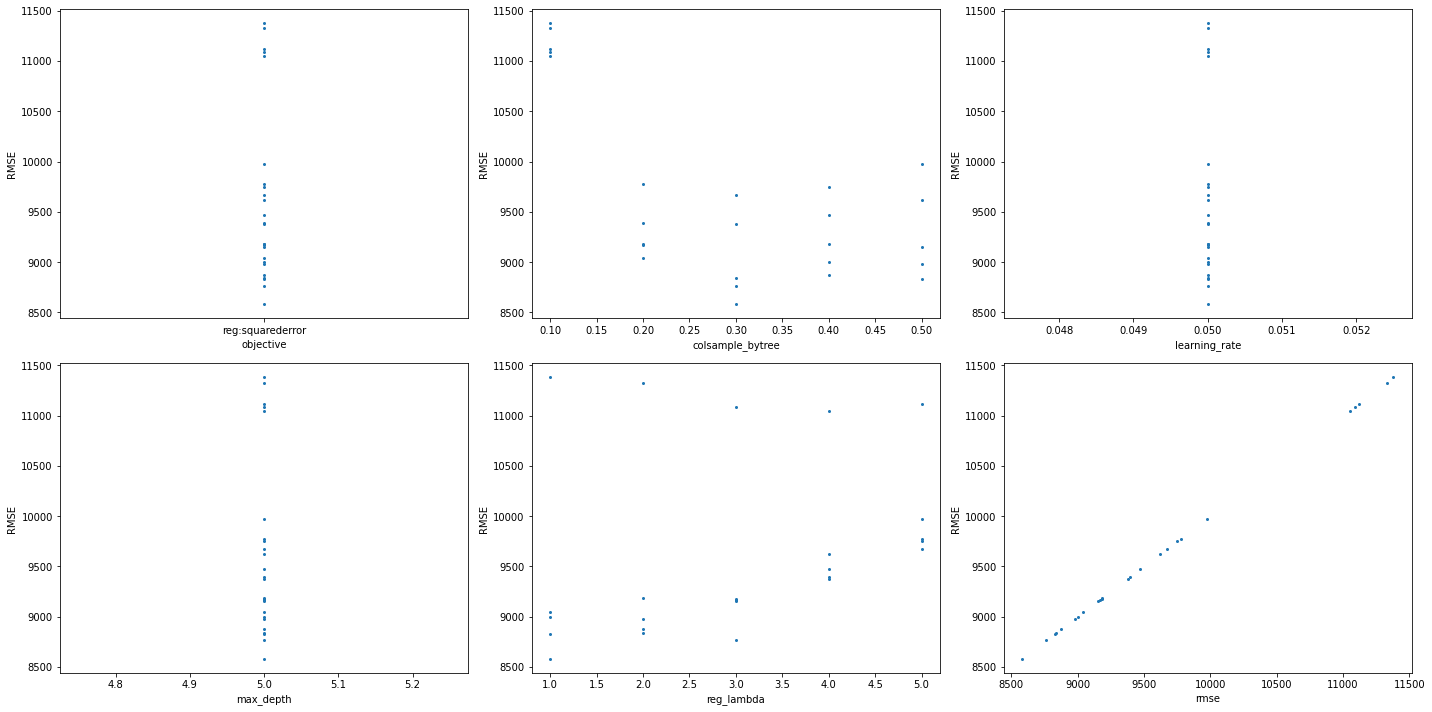

In [36]:
plot_search_results(grid_results_df)

**Importing Test Dataset**

In [ ]:
! unzip drive/MyDrive/CSCI_4146_a2/1st_test.zip -d bearing_test_data

In [ ]:
df_test = import_dataset('bearing_test_data/1st_test/*', raw=False, test=True)
df_test = df_test.sort_values('date')
display(df_test)
df_test = df_test.drop('date', axis=1)
df_test['rul'] = np.arange(df_test.shape[0])
df_test['rul'] = df_test['rul'].sort_values(ascending=False)
df_test['rul'] *= 600
display(df_test)

In [63]:
df_test_normalized = df_test.copy()
df_test_normalized = df_test_normalized.drop('rul', axis=1)
df_test_normalized = (df_test_normalized-df_test_normalized.min())/(df_test_normalized.max()-df_test_normalized.min())
df_test_normalized['rul'] = df_test['rul']
display(df_test_normalized)

,b1_vib_sig,b1_rms,b1_var,b1_skew,b1_kurt,b1_shape,b1_crest,b2_vib_sig,b2_rms,b2_var,b2_skew,b2_kurt,b2_shape,b2_crest,b3_vib_sig,b3_rms,b3_var,b3_skew,b3_kurt,b3_shape,b3_crest,b4_vib_sig,b4_rms,b4_var,b4_skew,b4_kurt,b4_shape,b4_crest,rul
0,0.489965,0.717487,0.348092,0.562204,0.279150,0.150111,0.165416,0.182874,0.387398,0.075312,0.508135,0.036923,0.184822,0.335910,0.044220,0.122111,0.019986,0.319660,0.001032,0.060269,0.042045,0.106576,0.538682,0.088908,0.494345,0.001202,0.213697,0.074313,1293000
0,0.270366,0.755617,0.323781,0.441098,0.277763,0.055426,0.289765,0.076923,0.376026,0.053915,0.491615,0.026591,0.137626,0.404946,0.040411,0.122698,0.018986,0.323680,0.001072,0.030076,0.034593,0.084456,0.544927,0.077150,0.495768,0.001085,0.185913,0.062166,1292400
0,0.270366,0.707588,0.335977,0.326621,0.248753,0.142551,0.214263,0.098694,0.362775,0.048113,0.492965,0.021158,0.147349,0.418277,0.027989,0.120886,0.019682,0.321765,0.001113,0.042565,0.030702,0.083048,0.534756,0.079233,0.496334,0.001097,0.195024,0.054579,1291800
0,0.448642,0.730344,0.307136,0.349614,0.251047,0.069735,0.243062,0.129173,0.357037,0.051227,0.540454,0.024712,0.142045,0.328874,0.039748,0.122283,0.019692,0.319006,0.001194,0.047457,0.061853,0.053489,0.537765,0.074981,0.492461,0.000916,0.192630,0.044389,1291200
0,0.472255,0.734785,0.321841,0.255743,0.263041,0.098280,0.452146,0.179971,0.361013,0.051279,0.508915,0.027029,0.140149,0.423525,0.034780,0.124790,0.019461,0.319766,0.001101,0.034273,0.087654,0.116831,0.546327,0.082707,0.496807,0.001292,0.193595,0.057011,1290600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.495868,0.767698,0.373804,0.543452,0.386814,0.126370,0.289975,0.343977,0.374550,0.062348,0.540737,0.035778,0.148475,0.693320,0.055813,0.125835,0.020783,0.319561,0.001222,0.055775,0.045987,0.099538,0.549690,0.092133,0.496067,0.001307,0.211196,0.055900,2400
0,0.118064,0.703701,0.282604,0.323745,0.185265,0.050619,0.194595,0.155298,0.351973,0.044571,0.588398,0.022898,0.114179,0.193613,0.037595,0.119378,0.019157,0.321325,0.001036,0.045274,0.020286,0.098331,0.540033,0.089206,0.494450,0.001289,0.210683,0.063535,1800
0,0.123967,0.716506,0.344595,0.475470,0.252583,0.135283,0.072005,0.208999,0.366443,0.056413,0.557708,0.028992,0.139280,0.354506,0.041736,0.123781,0.020659,0.322667,0.001160,0.043361,0.028957,0.106978,0.538297,0.088173,0.498063,0.001208,0.205700,0.074376,1200
0,0.198347,0.748427,0.315278,0.472838,0.239879,0.045057,0.175500,0.240929,0.367736,0.047797,0.517949,0.021292,0.132651,0.176026,0.027989,0.123098,0.019185,0.321205,0.000987,0.036587,0.052005,0.094309,0.545241,0.082390,0.496645,0.001162,0.197600,0.057172,600


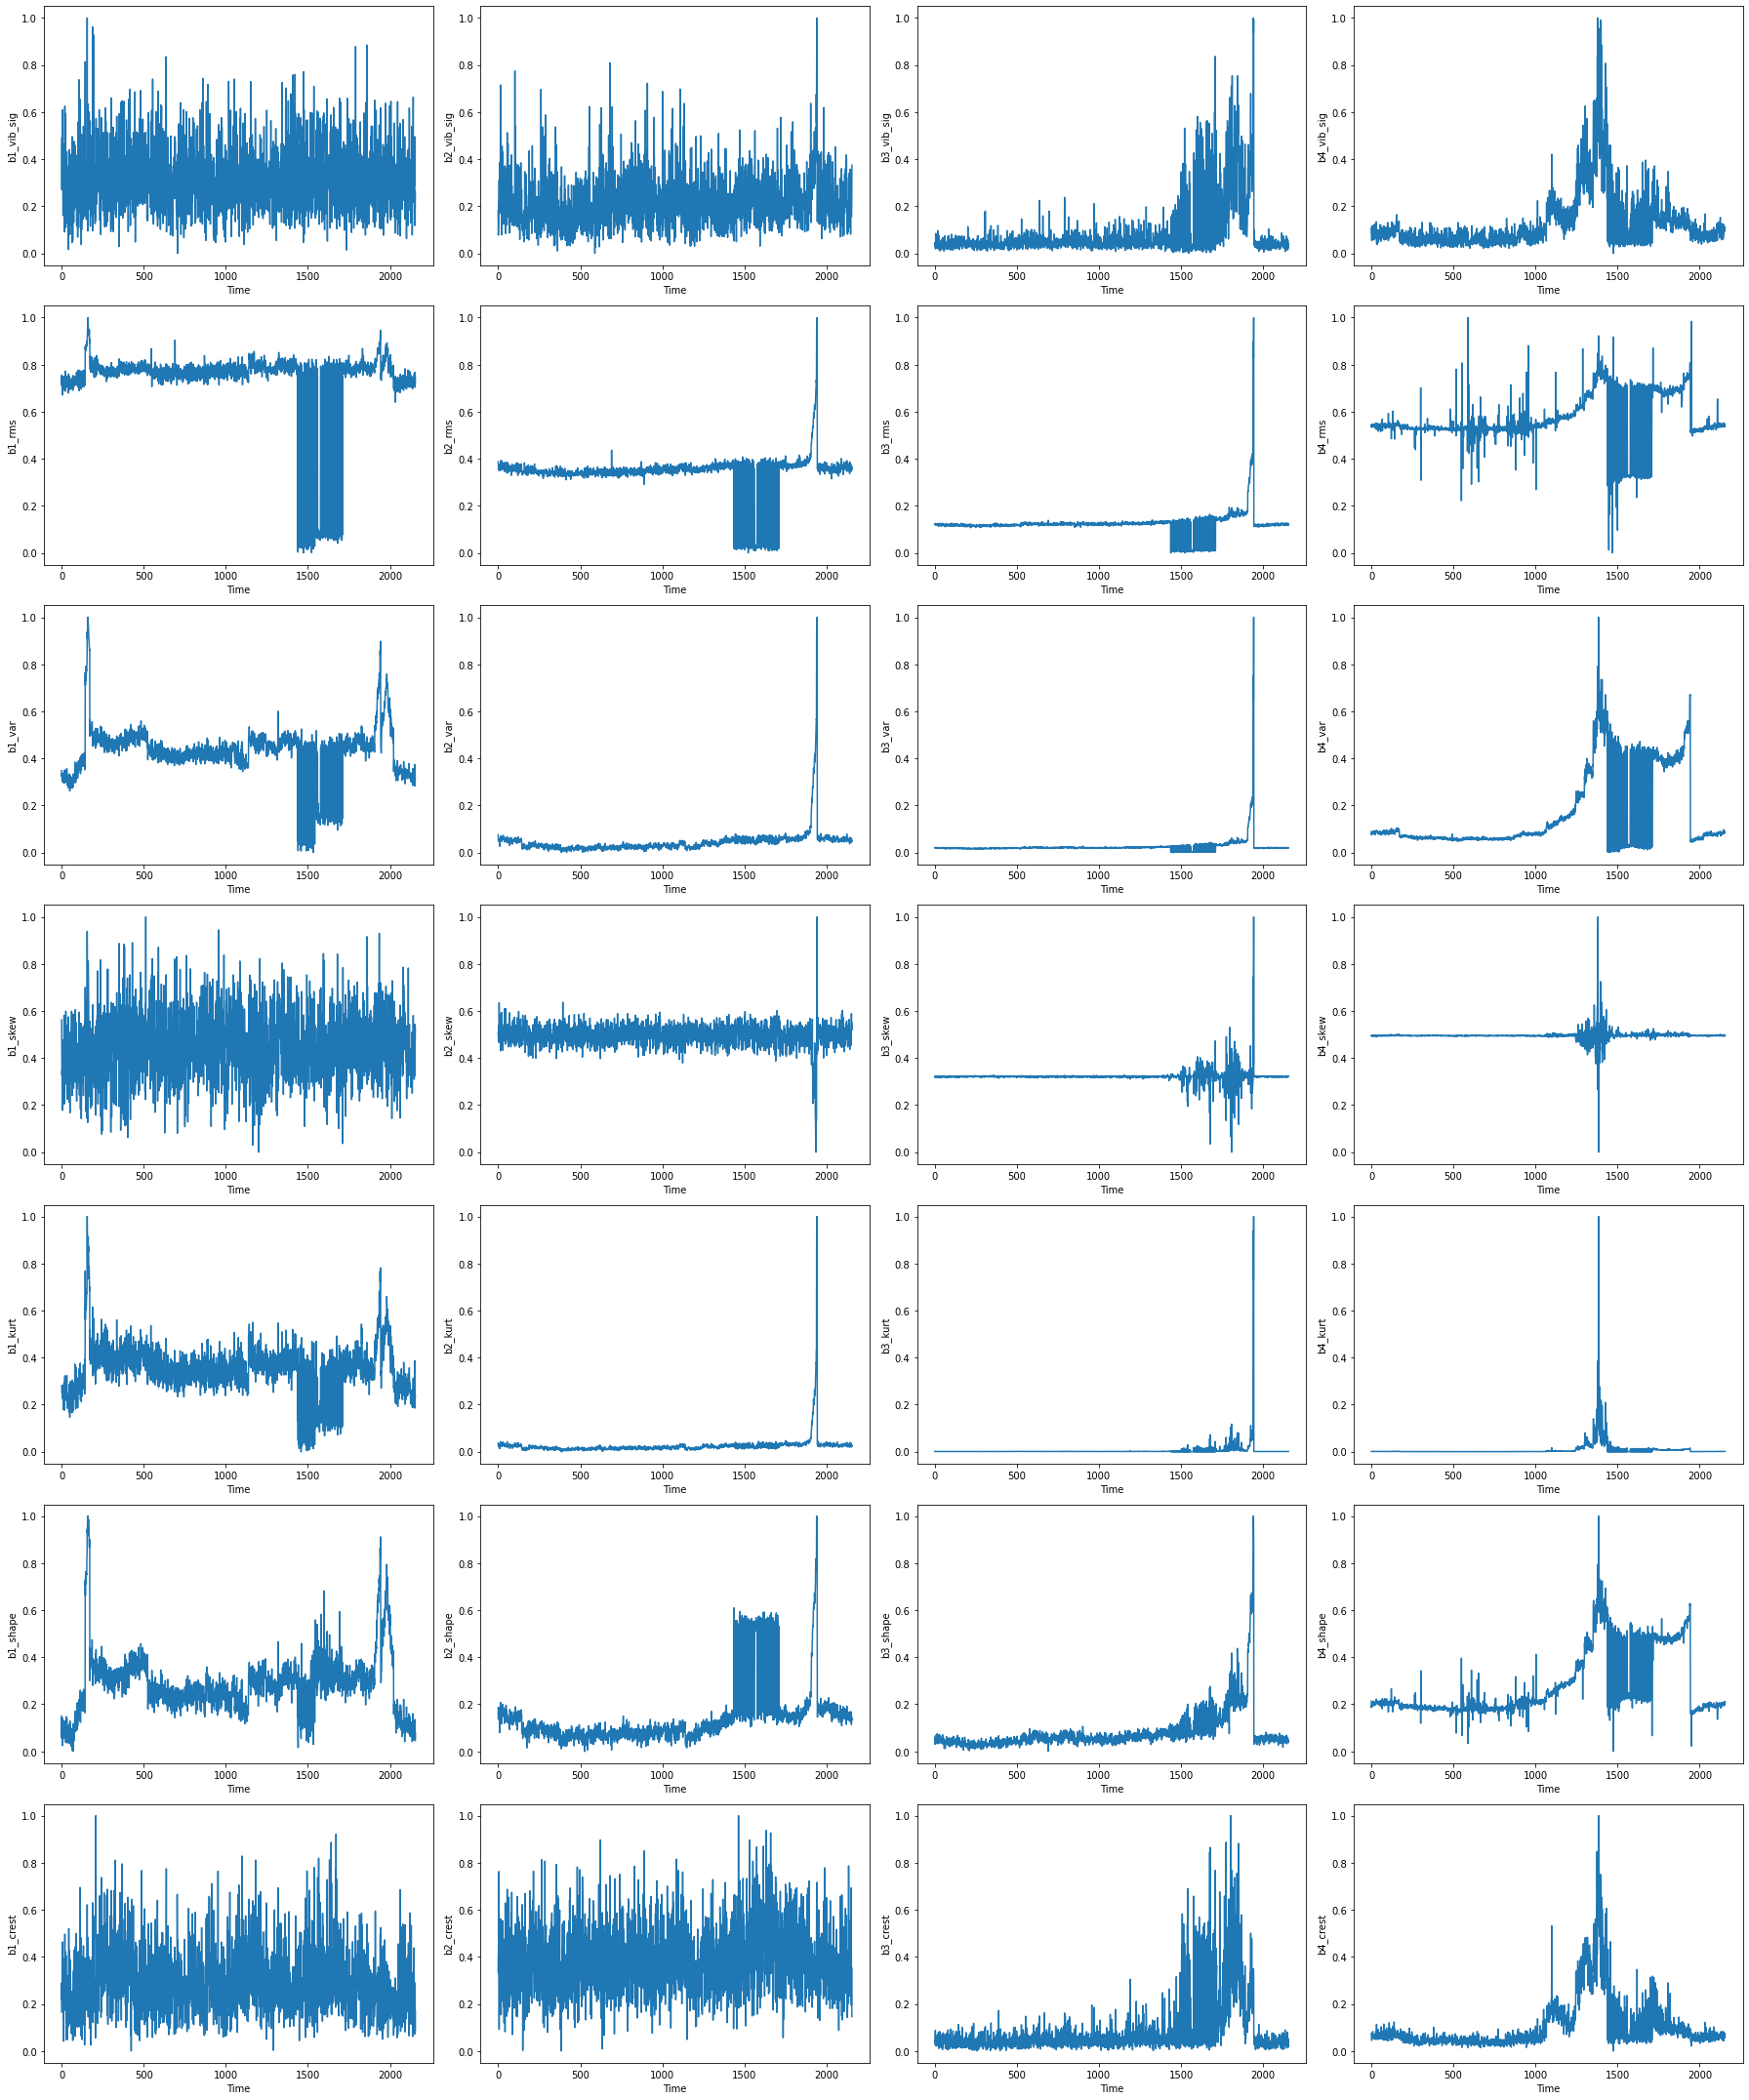

In [64]:
plot_features(df_test_normalized)

In this experiment we notice that bearings 3 and 4 (the bearings which fail) start to exhibit divergent behaviour around time 1000. Thus we will throw away everything before this time, as we can assume the presence of a model which would classify all data before this point to be during the healthy stage and so wouldn't feed that data to our model.

We also point out that this data behaves differently than the data we trained on, and so we do not expect our model to generalize very well.

In [73]:
df_test_final = df_test_normalized[1000:]
drop_features = ['b3_vib_sig','b2_skew','b3_skew','b4_skew','b2_shape','b4_shape', 'b4_crest']
df_test_final = df_test_final.copy()
df_test_final = df_test_final.drop(drop_features, axis=1)

In [97]:
# Optimal model hyper-param settings from search
params = {"objective":'reg:squarederror',
         "colsample_bytree":0.3,
         "learning_rate":0.05,
         "max_depth":5,
         "reg_lambda":1}

final_out = train(X_train_full, y_train_full, params, X_test, y_test, test=True)
xg_final = final_out[1]
print("=========> RMSE (Scenario 1: trained on 2nd_test train set, tested on 2nd_test test set): {}".format(final_out[0]))

predictors = df_test_final.columns.tolist()
predictors.remove('rul')
X = df_test_final[[*predictors]].copy()
y = df_test_final['rul'].copy()
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.1, random_state=100)
final_out2 = train(X_train_full, y_train_full, params, X_test_final, y_test_final, test=True)
xg_final2 = final_out2[1]
print("=========> RMSE (Scenario 2: trained on 2nd_test train set, tested on 1st_test test set): {}".format(final_out2[0]))

final_out3 = train(X_train_final, y_train_final, params, X_test_final, y_test_final, test=True)
xg_final3 = final_out3[1]
print("=========> RMSE (Scenario 3: trained on 1st_test train set, tested on 1st_test test set): {}".format(final_out3[0]))

=========> RMSE (Scenario 1: trained on 2nd_test train set, tested on 2nd_test test set): 6428.048103625558
=========> RMSE (Scenario 2: trained on 2nd_test train set, tested on 1st_test test set): 312724.6068764464
=========> RMSE (Scenario 3: trained on 1st_test train set, tested on 1st_test test set): 32587.884584834926


### (2f) Overfitting
We make sure not to overfit by applying L2 regularization to our loss function during training. The lambda parameter in our model corresponds to the weight applied to our regularization term, and we have set this to 10 in our final result. L2 regularization reduces overfitting by adding an extra term to our loss function, the sum the squared weights in the model. This motivates the model to keep weights small and improves the model's ability to generalize.

### (2g) Learning Curve

In [84]:
points = []

for i in range(14, 345, 15):
  points.append({
      'train_samples':i,
      'rmse_train1': train(X_train_full[:i], y_train_full[:i], params, X_train_full, y_train_full),
      'rmse_test1': train(X_train_full[:i], y_train_full[:i], params, X_test, y_test),
      'rmse_train2': train(X_train_full[:i], y_train_full[:i], params, X_train_full, y_train_full),
      'rmse_test2': train(X_train_full[:i], y_train_full[:i], params, X_test_final, y_test_final),
      'rmse_train3': train(X_train_final[:i], y_train_final[:i], params, X_train_final, y_train_final),
      'rmse_test3': train(X_train_final[:i], y_train_final[:i], params, X_test_final, y_test_final),
  })

learning_curve_df = pd.DataFrame(points)
display(learning_curve_df) 

,train_samples,rmse_train1,rmse_test1,rmse_train2,rmse_test2,rmse_train3,rmse_test3
0,14,29349.880127,21308.083148,29349.880127,269440.098009,169655.668155,150531.057900
1,29,22703.502716,13954.579883,22703.502716,280175.785925,111759.716653,111311.303160
2,44,20805.479615,11847.796795,20805.479615,260698.762950,93017.988723,96582.532229
3,59,19824.246054,10534.256507,19824.246054,271222.012486,93261.803706,96003.183406
4,74,13254.739375,17691.070762,13254.739375,331776.925085,84373.836228,86217.658329
5,89,12648.195743,15980.336973,12648.195743,338790.323509,76681.916644,77692.363585
6,104,10836.942857,14355.836688,10836.942857,339389.016736,77178.284787,87379.355409
7,119,11834.606631,16515.876400,11834.606631,333957.272911,74532.433758,79035.258528
8,134,10052.818014,11789.226011,10052.818014,325932.645596,72113.751275,71553.040170
9,149,7905.732624,11862.959719,7905.732624,338830.865261,68350.927683,66444.838271


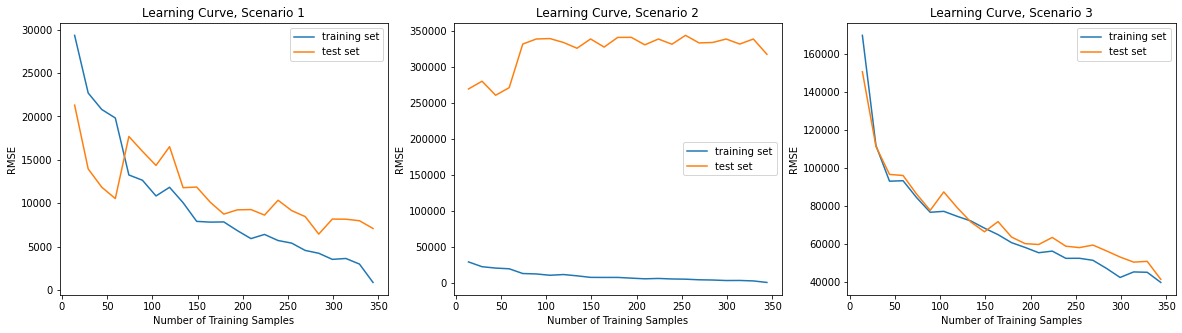

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), squeeze=False)
for i in range(3):
  axes[0][i].plot(learning_curve_df['train_samples'], learning_curve_df['rmse_train'+str(i+1)], label='training set')
  axes[0][i].plot(learning_curve_df['train_samples'], learning_curve_df['rmse_test'+str(i+1)], label='test set')
  axes[0][i].set_xlabel('Number of Training Samples')
  axes[0][i].set_ylabel('RMSE')
  axes[0][i].set_title('Learning Curve, Scenario ' + str(i+1))
  axes[0][i].legend()

### (2h) Analyze Results

We test in three different scenarios here:

* Scenario 1 (RMSE 6428) : Split 2nd_test dataset into training, validation, and test partitions. After hyper-parameter tuning, the model is very effective and generalizes well to the test set. It is able to predict RUL to within ~6400 seconds, which is less than 2h. We can see in the learning curve for this scenario that the model seems to generalize well, as we see both training and test RMSE decrease together, and when we stop, test RMSE is just starting to plateau.

* Scenario 2 (RMSE 312,724) : Use 2nd_test data to train, and 1st_test data to test. This model fails miserably. This does not seem surprising, as our model was trained to place emphasis on features which are highly correlated with the RUL of bearing 1 (i.e. we see them start to vary significantly when bearing 1 is close to failure). But in 1st_test, bearing 3 and 4 are the ones that fail, so different features are correlated with these events (for example, features that measure bearings 3 and 4 of course exhibit much more highly correlated behaviour with the target in the test set than in the training set). It does not make sense to use 2nd_test as a training set and 1st_test as a test set, because there are events that occur in 1st_test that do not occur in 2nd_test. If we want our model to detect the failure of the system in general, we should have trained it on data where RUL is infuenced by more than one bearing. This hypothesis is supported by our third scenario, and by the learning curve which shows our model is not able to generalize at all even with the full data set. This is an example of concept drift.

* Scenario 3 (RMSE 32587) : Split 1st_test into training and test sets. Train on training set, test on test set. We can see that even without hyper-parameter tuning, the RMSE is lower by an order of magnitude compared to scenario 2. This supports the proposition that the behaviour seen in 1st_test data is not well represented in the 2nd_test data, and thus it does not make sense to train on one and test on the other. We suggest that in order to train a model to detect failure in the system in general, the model should be both trained and tested on data that observes all four bearings failing (i.e. by concatenating 1st_test, 2nd_test, and a data set where bearing 2 fails, then shuffling and splitting this large dataset in training, validation, and test sets). The learning curve here shows that the training and test error are still decreasing even with the max sized data set. This is likely due to the fact that we only included this to prove scenario 2 is ineffective, and didn't spend any time tuning the parameters for this network.

In conclusion, we believe that the XGboost model was effective for this problem, but utilizing data from different scenarios causes the model to be ineffective.

# 3) Neural Network Model

### (3a) Task
As in question 2 we are solving a supervised regression problem.

### (3b) Feature Selection
We saw good performance from XGboost using a subset of features. We would like to use the same features for the neural net so as to compare these two models.

### (3c) Evaluation Metric

We will use the RMSE evaluation metric again, for the same reasons as listed in question 2. We note that the PyTorch loss function implemented here utilizes the MSE directly. We simply convert to RMSE whenever we need to interpret results.

### (3d) Hyper-Parameter Tuning

We note that for this set of tests, our model takes significantly longer to train that the XGboost model. Thus we spent some time exploring the hyper-parameters 

In [204]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
from torch.optim.lr_scheduler import OneCycleLR


def train_nn(df, params, batch_size=1, epoch=50, verbose=False, datasets=None, test=False):
  num_features = len(df.columns) - 1
  class BearingNet(torch.nn.Module):
      def __init__(self, n_feature, n_hidden):
          super(BearingNet, self).__init__()
          self.hidden1 = torch.nn.Linear(n_feature, n_hidden)
          self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
          self.hidden3 = torch.nn.Linear(n_hidden, n_hidden)
          self.predict = torch.nn.Linear(n_hidden, 1)

      def forward(self, x):
          x = F.relu(self.hidden1(x))
          x = F.relu(self.hidden2(x))
          x = F.relu(self.hidden3(x))
          x = self.predict(x)
          return x

  BATCH_SIZE = batch_size
  EPOCH = epoch
  model = BearingNet(n_feature=num_features, n_hidden=150)
  optimizer = torch.optim.Adam(model.parameters(), weight_decay=params['wd'])
  scheduler = OneCycleLR(optimizer,
                        max_lr=params['max_lr'],
                        epochs=EPOCH,
                        steps_per_epoch=int(math.floor(df.shape[0] / BATCH_SIZE)),
                        cycle_momentum=False,
                        pct_start=0.15
                        )
  loss_func = torch.nn.MSELoss()

  predictors = df.columns.tolist()
  predictors.remove('rul')
  X = df[[*predictors]].copy()
  y = df['rul'].copy()

  if datasets is None:
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
    X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=10)

  else:
    X_train = datasets['X_train']
    y_train = datasets['y_train']
    X_test = datasets['X_test']
    y_test = datasets['y_test']

  curr_train_X = torch.tensor(X_train.values.astype(np.float32))
  curr_train_y = torch.tensor(y_train.values.astype(np.float32))
  train_tensor = Data.TensorDataset(curr_train_X, curr_train_y)
  train_loader = Data.DataLoader(dataset=train_tensor, 
                                      batch_size=BATCH_SIZE, 
                                      shuffle=True,
                                      num_workers=2)

  curr_test_X = torch.tensor(X_test.values.astype(np.float32))
  curr_test_y = torch.tensor(y_test.values.astype(np.float32))
  test_tensor = Data.TensorDataset(curr_test_X, curr_test_y)
  test_loader = Data.DataLoader(dataset=test_tensor, 
                                batch_size=BATCH_SIZE, 
                                shuffle=True,
                                num_workers=2)

  output = {
      "time": [],
      "train_rmse": [],
      "val_rmse": []
  }
  min_val_rmse = -1
  min_train_rmse = -1
  
  for epoch in range(EPOCH):
    model.train()
    for step, (batch_x, batch_y) in enumerate(train_loader):
      b_x = Variable(batch_x)
      b_y = Variable(batch_y)

      prediction = model(b_x)

      loss = loss_func(prediction, b_y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      scheduler.step()

    if (epoch+1) % 10 == 0:

      model.eval()
      with torch.no_grad():
        val_rmse, steps = 0, 0
        for step, (batch_x, batch_y) in enumerate(test_loader):
          b_x = Variable(batch_x)
          b_y = Variable(batch_y)
          prediction = model(b_x)
          val_loss = loss_func(prediction, b_y)
          val_rmse += np.sqrt(val_loss.item())
          steps += 1
        val_rmse /= steps
        train_rmse, steps = 0, 0
        for step, (batch_x, batch_y) in enumerate(train_loader):
          b_x = Variable(batch_x)
          b_y = Variable(batch_y)
          prediction = model(b_x)
          train_loss = loss_func(prediction, b_y)
          train_rmse += np.sqrt(train_loss.item())
          steps += 1
        train_rmse /= steps

      if min_train_rmse < 0 or train_rmse < min_train_rmse:
        min_train_rmse = train_rmse
      if min_val_rmse < 0 or val_rmse < min_val_rmse:
        min_val_rmse = val_rmse

      for param_group in optimizer.param_groups:
        lr = param_group['lr']
      if verbose:
        print("Epoch {}: train {}, val {}, lr {}".format(epoch, round(train_rmse, 3), round(val_rmse, 3), lr))
      output['time'].append(epoch)
      output['train_rmse'].append(train_rmse)
      output['val_rmse'].append(val_rmse)

  if test:
    return min_train_rmse, min_val_rmse
  else:
    return min_val_rmse

In [188]:
grid = [{"max_lr":max_lr,
         "wd":wd} 
        for max_lr in [0.1, 0.01, 0.001] 
        for wd in [0, 0.1, 0.01]]

grid_results = []
for params in grid:
  params['rmse'] = train_nn(df_final, params)
  grid_results.append(params)
  print(params)

grid_results_df = pd.DataFrame(grid_results)  

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


{'max_lr': 0.1, 'wd': 0, 'rmse': 22774.092339459137}
{'max_lr': 0.1, 'wd': 0.1, 'rmse': 22265.93469081302}
{'max_lr': 0.1, 'wd': 0.01, 'rmse': 20900.17378139351}
{'max_lr': 0.01, 'wd': 0, 'rmse': 22615.793708529993}
{'max_lr': 0.01, 'wd': 0.1, 'rmse': 21172.975927947788}
{'max_lr': 0.01, 'wd': 0.01, 'rmse': 21155.07802724175}
{'max_lr': 0.001, 'wd': 0, 'rmse': 28750.274101037416}
{'max_lr': 0.001, 'wd': 0.1, 'rmse': 29749.6370953291}
{'max_lr': 0.001, 'wd': 0.01, 'rmse': 29632.0026882898}


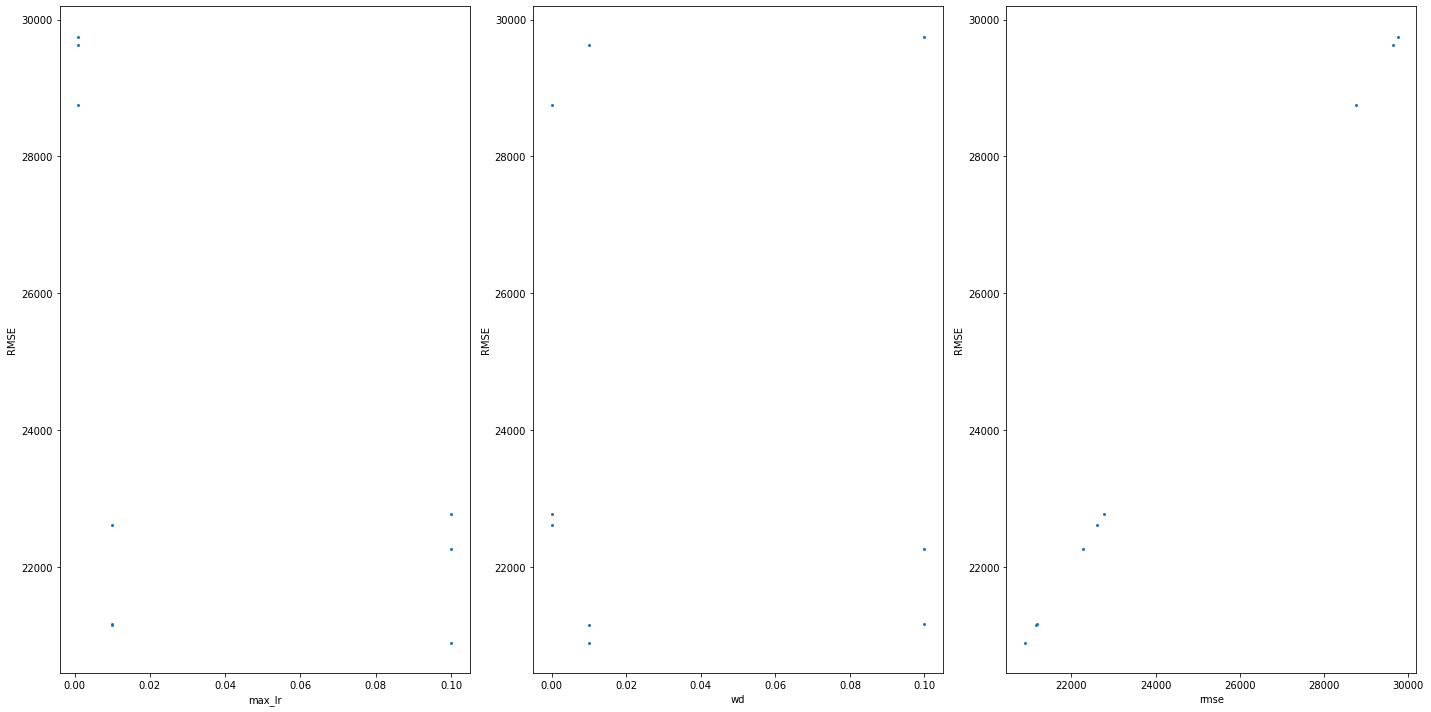

In [189]:
plot_search_results(grid_results_df)

In [190]:
grid = [{"max_lr":max_lr,
         "wd":wd} 
        for max_lr in [0.06, 0.03, 0.01,] 
        for wd in [0.01, 0.005, 0.001]]

grid_results = []
for params in grid:
  params['rmse'] = train_nn(df_final, params)
  grid_results.append(params)
  print(params)

grid_results_df = pd.DataFrame(grid_results)  

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


{'max_lr': 0.06, 'wd': 0.01, 'rmse': 20416.484206726363}
{'max_lr': 0.06, 'wd': 0.005, 'rmse': 13101.512040256892}
{'max_lr': 0.06, 'wd': 0.001, 'rmse': 20153.880686403776}
{'max_lr': 0.03, 'wd': 0.01, 'rmse': 18165.782648645643}
{'max_lr': 0.03, 'wd': 0.005, 'rmse': 13826.74087968424}
{'max_lr': 0.03, 'wd': 0.001, 'rmse': 16836.743486442196}
{'max_lr': 0.01, 'wd': 0.01, 'rmse': 22013.89324707649}
{'max_lr': 0.01, 'wd': 0.005, 'rmse': 21007.051551422595}
{'max_lr': 0.01, 'wd': 0.001, 'rmse': 21945.123767201683}


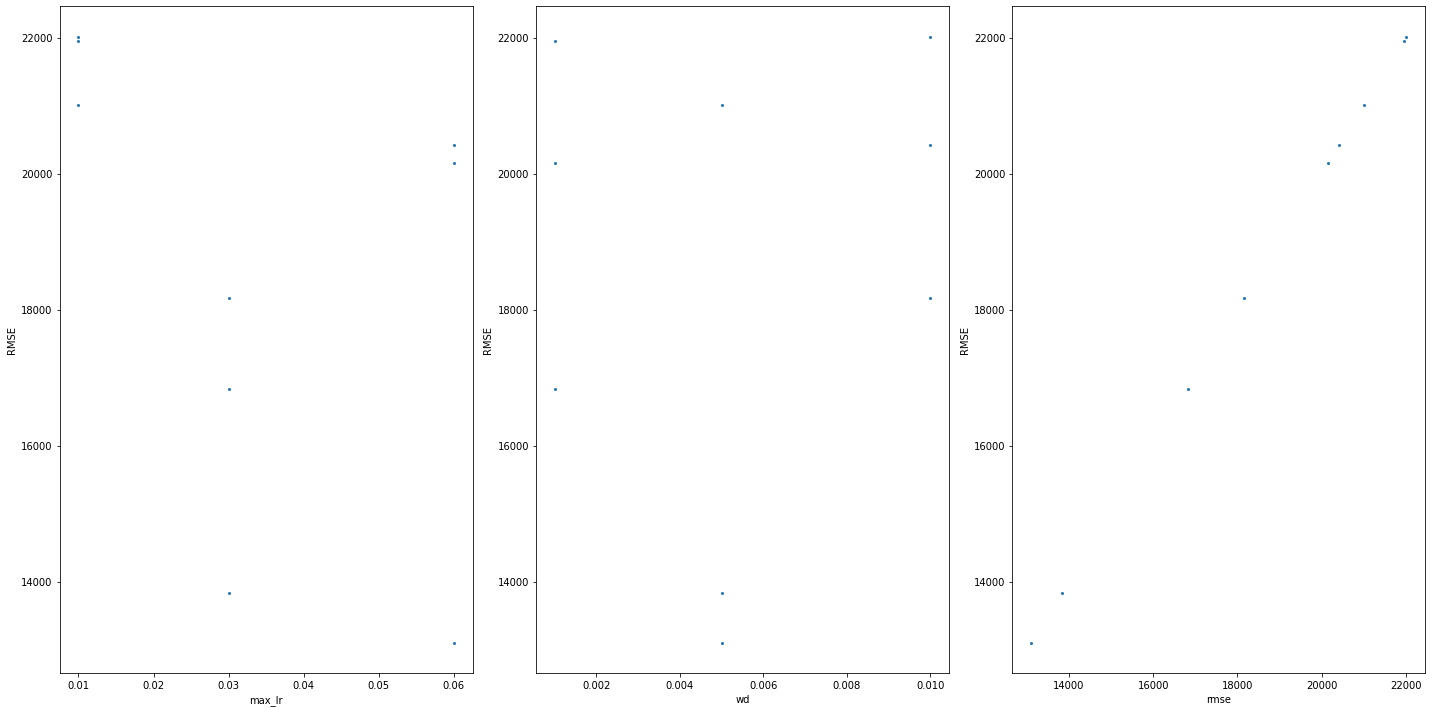

In [191]:
plot_search_results(grid_results_df)

In [203]:
# Optimal model hyper-param settings from search
params = {"max_lr":0.03,
         "wd":0.005}

predictors = df_final.columns.tolist()
predictors.remove('rul')
X = df_final[[*predictors]].copy()
y = df_final['rul'].copy()
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=100)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=100)

datasets = {
    "X_train": X_train_full,
    "y_train": y_train_full,
    "X_test": X_test,
    "y_test": y_test
}
final_out = train_nn(df_final, params, datasets=datasets)
print("=========> RMSE (Scenario 1: trained on 2nd_test train set, tested on 2nd_test test set): {}".format(final_out))

predictors = df_test_final.columns.tolist()
predictors.remove('rul')
X = df_test_final[[*predictors]].copy()
y = df_test_final['rul'].copy()
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.1, random_state=100)
datasets = {
    "X_train": X_train_full,
    "y_train": y_train_full,
    "X_test": X_test_final,
    "y_test": y_test_final
}
final_out2 = train_nn(df_final, params, datasets=datasets)
print("=========> RMSE (Scenario 2: trained on 2nd_test train set, tested on 1st_test test set): {}".format(final_out2))

datasets = {
    "X_train": X_train_final,
    "y_train": y_train_final,
    "X_test": X_test_final,
    "y_test": y_test_final
}
final_out3 = train_nn(df_test_final, params, datasets=datasets)
print("=========> RMSE (Scenario 3: trained on 1st_test train set, tested on 1st_test test set): {}".format(final_out3))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


=========> RMSE (Scenario 1: trained on 2nd_test train set, tested on 2nd_test test set): 11405.307492896389
=========> RMSE (Scenario 2: trained on 2nd_test train set, tested on 1st_test test set): 321451.6588159203
=========> RMSE (Scenario 3: trained on 1st_test train set, tested on 1st_test test set): 26572.241271566298


### (3f) Overfitting
We prevent overfitting by using weight decay, which implements L2 regularization. This is the same regularization method applied in section 2 to XGBoost.

### (3g) Learning Curve

In [205]:
points = []

for i in range(14, 345, 15):
  datasets = {
      "X_train": X_train_full[:i],
      "y_train": y_train_full[:i],
      "X_test": X_test[:i],
      "y_test": y_test[:i]
  }
  s1 = train_nn(df_final, params, datasets=datasets, test=True)
  datasets = {
      "X_train": X_train_full[:i],
      "y_train": y_train_full[:i],
      "X_test": X_test_final[:i],
      "y_test": y_test_final[:i]
  }
  s2 = train_nn(df_final, params, datasets=datasets, test=True)
  datasets = {
      "X_train": X_train_final[:i],
      "y_train": y_train_final[:i],
      "X_test": X_test_final[:i],
      "y_test": y_test_final[:i]
  }
  s3 = train_nn(df_test_final, params, datasets=datasets, test=True)
  points.append({
      'train_samples':i,
      'rmse_train1': s1[0],
      'rmse_test1': s1[1],
      'rmse_train2': s2[0],
      'rmse_test2': s2[1],
      'rmse_train3': s3[0],
      'rmse_test3': s3[1],
  })

learning_curve_df = pd.DataFrame(points)
display(learning_curve_df) 

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fb02bf04128>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionErro

,train_samples,rmse_train1,rmse_test1,rmse_train2,rmse_test2,rmse_train3,rmse_test3
0,14,46101.116024,65469.082743,46369.756710,256036.514632,144916.328043,201126.251119
1,29,29949.111515,25086.681242,31401.876847,221381.971438,159680.242206,180386.792192
2,44,23179.234425,24418.519060,23866.991596,233658.813347,161701.951514,153355.445238
3,59,22709.417005,22334.988894,22640.228848,268177.940559,139309.676145,147178.159589
4,74,30264.197056,26602.505200,33159.070702,272019.148012,139572.021416,140133.585913
5,89,28722.399551,23223.493627,29011.034450,303115.945438,120716.454115,123334.634911
6,104,25697.116277,19591.116700,24460.839950,310761.905466,109087.027166,117361.766482
7,119,22803.514110,17507.754663,19912.026891,320618.373902,104260.162427,104249.266999
8,134,28144.205442,24887.336687,20776.970977,324288.585591,69473.625848,79768.342000
9,149,19444.019450,17067.552198,21204.085299,323273.856237,70116.286165,70373.016699


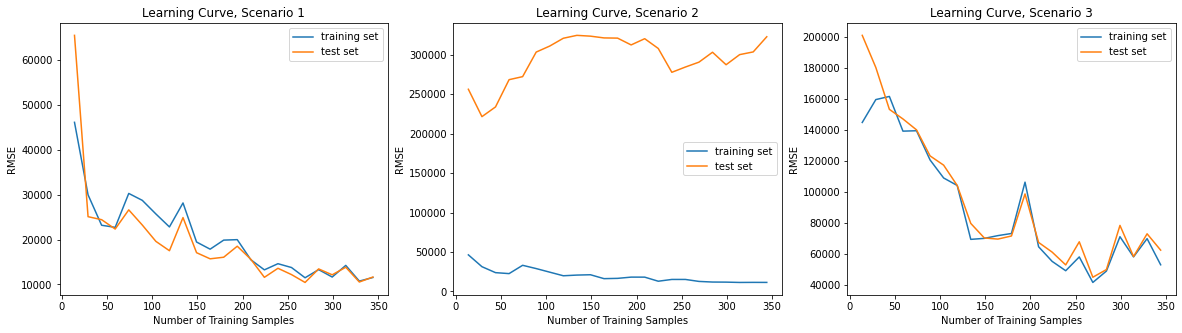

In [206]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), squeeze=False)
for i in range(3):
  axes[0][i].plot(learning_curve_df['train_samples'], learning_curve_df['rmse_train'+str(i+1)], label='training set')
  axes[0][i].plot(learning_curve_df['train_samples'], learning_curve_df['rmse_test'+str(i+1)], label='test set')
  axes[0][i].set_xlabel('Number of Training Samples')
  axes[0][i].set_ylabel('RMSE')
  axes[0][i].set_title('Learning Curve, Scenario ' + str(i+1))
  axes[0][i].legend()

### (3h) Analysis

As before we note that, because of concept drift, we see very poor performance in scenario 2. While this model was not as effective as XGBoost, we see that it is still able to learn, and make correct predictions with RMSE of approximately 10000 (3 hours) for the data set from 2nd_test, and RMSE of approximately 40,000 (11 hours) for the data set from 1st_test.

Looking at our learning curves we again see that the model is still underfitting (they are still learning). We could improve this model by increasing the number of epochs until it overfits, then increasing regularization, but because of our limited time and compute resources, we opted to keep the training regimen restricted to 50 epochs.

### (3i) Statistical Significance Test

In [208]:
xgb_hparams = {"objective":'reg:squarederror',
               "colsample_bytree":0.3,
               "learning_rate":0.05,
               "max_depth":5,
               "reg_lambda":1}
nn_hparams = {"max_lr":0.03,
              "wd":0.005}

predictors = df_final.columns.tolist()
predictors.remove('rul')
X = df_final[[*predictors]].copy()
y = df_final['rul'].copy()

rmse_vals = []
for i in range(0, 20):
  X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=i)

  rmse_xgb = train(X_train_full, y_train_full, xgb_hparams, X_test_final, y_test_final, test=True)
  datasets = {
      "X_train": X_train_full,
      "y_train": y_train_full,
      "X_test": X_test,
      "y_test": y_test
  }
  rmse_nn = train_nn(df_final, nn_hparams, datasets=datasets)

  rmse_vals.append({
      'rmse_xgb':rmse_xgb,
      'rmse_nn':rmse_nn
  })

rmse_compare_df = pd.DataFrame(rmse_vals)
display(rmse_compare_df)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, 

,rmse_xgb,rmse_nn
0,"(305346.74466140714, XGBRegressor(base_score=0...",8650.512599
1,"(303188.94678818644, XGBRegressor(base_score=0...",12280.486721
2,"(305027.71064576, XGBRegressor(base_score=0.5,...",14089.106399
3,"(299264.93623696495, XGBRegressor(base_score=0...",11711.272020
4,"(293122.3091963525, XGBRegressor(base_score=0....",15238.845721
5,"(315450.2946055243, XGBRegressor(base_score=0....",12624.049978
6,"(306187.3513524375, XGBRegressor(base_score=0....",14356.693426
7,"(345200.49640204967, XGBRegressor(base_score=0...",12035.135914
8,"(305868.1645247486, XGBRegressor(base_score=0....",12899.982619
9,"(305648.9812290977, XGBRegressor(base_score=0....",12702.330718


In [218]:
from scipy.stats import ttest_ind

df_rmse_compare_vals = rmse_compare_df.copy()
df_rmse_compare_vals['rmse_xgb'] = df_rmse_compare_vals.rmse_xgb.apply(lambda x: x[0])

rmse_xgb_all = df_rmse_compare_vals['rmse_xgb'].values
rmse_nn_all = df_rmse_compare_vals['rmse_nn'].values

stat, p = ttest_ind(rmse_xgb_all, rmse_nn_all)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=67.979, p=0.000


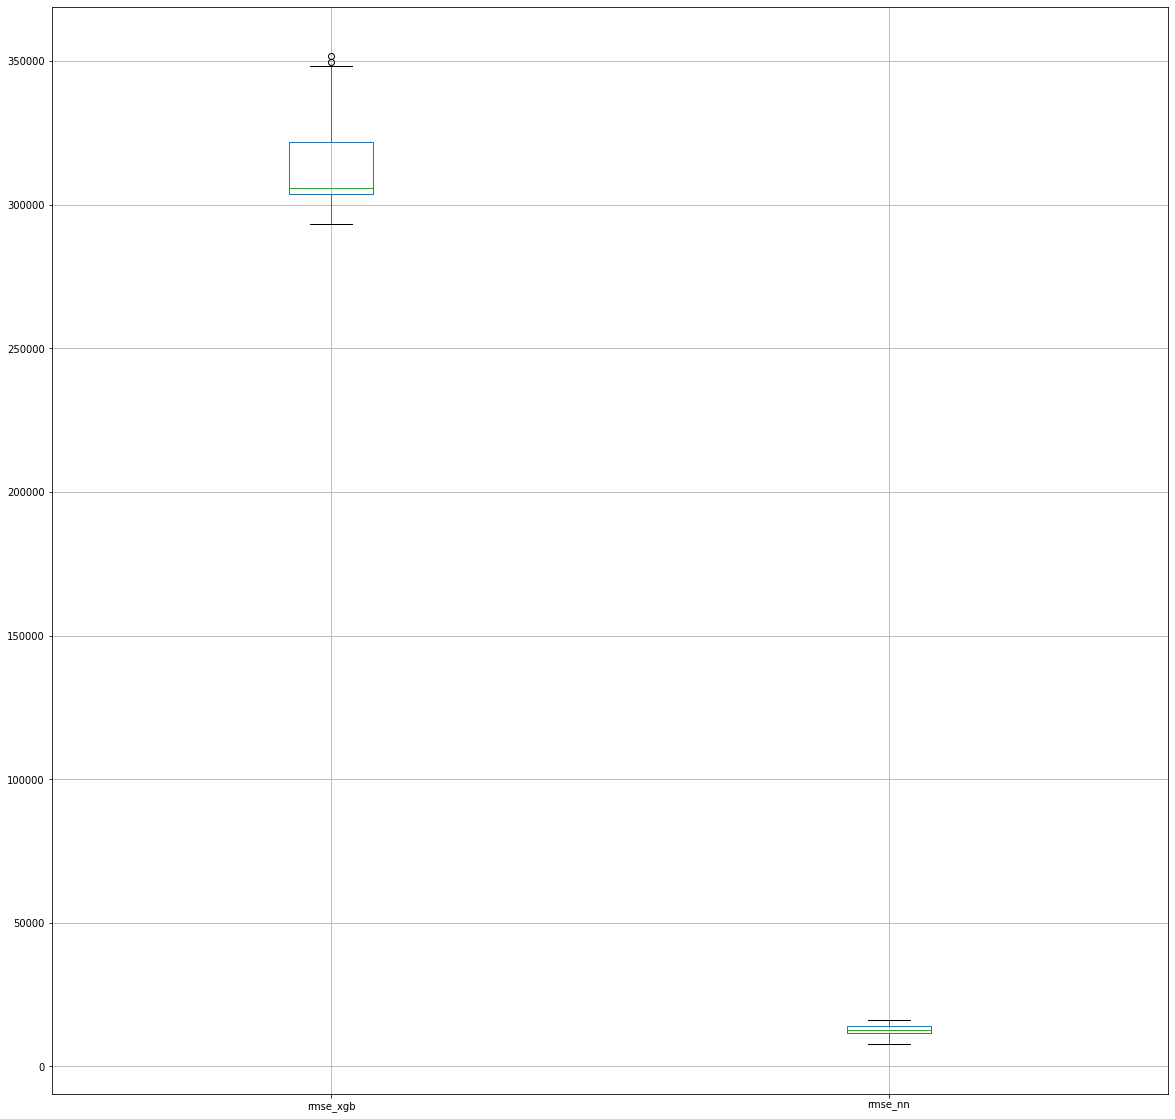

In [219]:
df_rmse_compare_vals.boxplot(column=['rmse_xgb', 'rmse_nn'])

There is a very clear statistically significant difference between these two models.

# 4) Concept Drift Detection